# Install packages & load data

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import re
from textblob import TextBlob
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
!pip install spacy
import spacy
from spacy.tokens import Token
!pip install textstat
from textstat import flesch_reading_ease
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
!pip install matplotlib seaborn

import numpy as np
from matplotlib.colors import LinearSegmentedColormap


#import language_tool_python

#!python -m spacy download en_core_web_md
#nlp = spacy.load('en_core_web_md')







Mounted at /content/drive


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.4/939.4 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 63.6 MB/s eta 0:00:00


In [ ]:
!python -m spacy download en_core_web_md
nlp = spacy.load('en_core_web_md')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 22.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
#Load data (scenario1/2/3)
ama_1 = pd.read_excel(r"/content/drive/My Drive/ECON 7055 NEW/ECON7055/chat content/toy content/Amazon/Amazon chat content.xlsx")
dou_1 = pd.read_excel(r"/content/drive/My Drive/ECON 7055 NEW/ECON7055/chat content/toy content/Douyin/Douyin toy English.xlsx")
tao_1 = pd.read_excel(r"/content/drive/My Drive/ECON 7055 NEW/ECON7055/chat content/toy content/Taobao/Taobao toy English.xlsx")
zal_1 = pd.read_excel(r"/content/drive/My Drive/ECON 7055 NEW/ECON7055/chat content/toy content/Zalora/Zalora toy.xlsx")

ama_2 = pd.read_excel(r"/content/drive/My Drive/ECON 7055 NEW/ECON7055/chat content/Scenario2/Amazon Scenario2/Amazon scenario2.xlsx")
dou_2 = pd.read_excel(r"/content/drive/My Drive/ECON 7055 NEW/ECON7055/chat content/Scenario2/Douyin scenario 2/Douyin scenario2 English.xlsx")
tao_2 = pd.read_excel(r"/content/drive/My Drive/ECON 7055 NEW/ECON7055/chat content/Scenario2/Taobao scenario2/Taobao scenario2 English.xlsx")
zal_2 = pd.read_excel(r"/content/drive/My Drive/ECON 7055 NEW/ECON7055/chat content/Scenario2/ZALORA SCENARIO 2/scenario2 ZALORA.xlsx")

ama_3 = pd.read_excel(r"/content/drive/My Drive/ECON 7055 NEW/ECON7055/chat content/scenario 3 content/Amazon/Amazon chat content.xlsx")
dou_3 = pd.read_excel(r"/content/drive/My Drive/ECON 7055 NEW/ECON7055/chat content/scenario 3 content/Douyin/Douyin scenario3 English.xlsx")
tao_3 = pd.read_excel(r"/content/drive/My Drive/ECON 7055 NEW/ECON7055/chat content/scenario 3 content/Taobao/Taobao scenario3 English.xlsx")
zal_3 = pd.read_excel(r"/content/drive/My Drive/ECON 7055 NEW/ECON7055/chat content/scenario 3 content/ZALORA/ZALORA.xlsx")

ama_baseline = pd.read_excel(r"/content/drive/My Drive/ECON 7055 NEW/ECON7055/chat content/platform all content/ama_all.xlsx")
dou_baseline = pd.read_excel(r"/content/drive/My Drive/ECON 7055 NEW/ECON7055/chat content/platform all content/dou all.xlsx")
tao_baseline = pd.read_excel(r"/content/drive/My Drive/ECON 7055 NEW/ECON7055/chat content/platform all content/tao all.xlsx")
zal_baseline = pd.read_excel(r"/content/drive/My Drive/ECON 7055 NEW/ECON7055/chat content/platform all content/zal all.xlsx")


In [ ]:
# Concatenate the DataFrames
ama_all = pd.concat([ama_1, ama_2, ama_3], ignore_index=True)
dou_all = pd.concat([dou_1, dou_2,dou_3], ignore_index=True)
tao_all = pd.concat([tao_1, tao_2,tao_3], ignore_index=True)
zal_all = pd.concat([zal_1, zal_2,zal_3], ignore_index=True)

In [ ]:
# Data Preprocessing
def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^A-Za-z\s.,;:!?]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = text.lower()
    return text

# Sentiment Analysis Function

In [ ]:

def analyze_sentiment_textblob(text):
    analysis = TextBlob(text)
    return {
        'polarity': analysis.sentiment.polarity,
        'subjectivity': analysis.sentiment.subjectivity
    }

def analyze_sentiment_vader(text):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(text)
    return scores

# Humanity Function

In [ ]:
# Define an extension for the emotion attribute
if not Token.has_extension("is_emotion"):
    Token.set_extension("is_emotion", default=False)

In [ ]:
def calculate_humanity_metrics(text):
    if not isinstance(text, str) or len(text.strip()) < 10:
        return {
            'lexical_diversity': 0.0,
            'avg_sentence_length': 0.0,
            'personal_pronouns_ratio': 0.0,
            'complexity_score': 0.0,
            'fluency_score_value': 0.0,
            'readability_score_value': 0.0
        }


    # correct text
    blob = TextBlob(text)
    corrected_text = blob.correct()

    # calculate the error
    original_words = text.split()
    corrected_words = corrected_text.split()
    grammar_error = sum(1 for original, corrected in zip(original_words, corrected_words) if original != corrected)



    # parse
    doc = nlp(text)
    words = [token for token in doc if not token.is_punct and not token.is_space]
    total_words = len(words)

    # lexical diversity
    unique_lemmas = len({token.lemma_.lower() for token in words})
    lexical_diversity = unique_lemmas / total_words if total_words > 0 else 0.0

    # average sentence length
    sentences = list(doc.sents)
    avg_sentence_length_raw = sum(len([token for token in sent if not token.is_punct]) for sent in sentences) / len(sentences) if sentences else 0.0
    avg_sentence_length = avg_sentence_length_raw / 30  # normalize the score

    # personal pronoun ratio
    personal_pronouns = {'i', 'me', 'my', 'mine', 'myself', 'we', 'us', 'our', 'ours', 'ourselves',
                        'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself',
                        'she', 'her', 'hers', 'herself', 'they', 'them', 'their', 'theirs', 'themself', 'themselves'}
    pronoun_count = sum(1 for token in words if token.lemma_.lower() in personal_pronouns)
    personal_pronouns_ratio = pronoun_count / total_words if total_words > 0 else 0.0

    # complexity
    avg_word_length = sum(len(token.text) for token in words) / total_words if total_words > 0 else 0.0
    avg_word_length_normalized = avg_word_length / 10  # normalize score
    complexity_score = (avg_word_length_normalized + avg_sentence_length) / 2

    # fluency score
    error_rate = grammar_error / total_words if total_words > 0 else 0.0
    fluency_score_value = max(0.0, 1.0 - error_rate)

    # reliability score
    try:
        readability_score_value = flesch_reading_ease(text) / 100
    except ZeroDivisionError:
        readability_score_value = 0.0


    return {
        'lexical_diversity': round(lexical_diversity, 4),
        'avg_sentence_length': round(avg_sentence_length, 4),
        'personal_pronouns_ratio': round(personal_pronouns_ratio, 4),
        'complexity_score': round(complexity_score, 4),
        'fluency_score_value': round(fluency_score_value, 4),
        'readability_score_value': round(readability_score_value, 4)
    }





In [ ]:
def calculate_humanity_score(metrics):
    weights = {
        'lexical_diversity': 0.25,
        'avg_sentence_length': 0.15,
        'personal_pronouns_ratio': 0.30,
        'complexity_score': 0.10,
        'fluency_score_value': 0.1,
        'readability_score_value': 0.1
    }

    #normalize score
    score = sum(metrics[metric] * weights[metric] for metric in weights.keys())
    normalized_score = max(0, min(1, score))

    #normalized_score = min(100, max(0, score * 100))

    return round(normalized_score, 2)

# prompt seperate by sentiment

In [ ]:
def senti_seperate_pos(df):
    # Create a copy to avoid modifying the original DataFrame
    analysis_df = df.copy()

    # Preprocess the text
    analysis_df['processed_prompt'] = analysis_df['prompt'].apply(preprocess_text)
    analysis_df['processed_response'] = analysis_df['response'].apply(preprocess_text)


    vader_results = analysis_df['processed_prompt'].apply(analyze_sentiment_vader)
    analysis_df['prompt_compound'] = vader_results.apply(lambda x: x['compound'])

    positive_df = analysis_df[analysis_df['prompt_compound'] >= 0.05][['prompt', 'response']]

    return positive_df

In [ ]:
def senti_seperate_neg(df):
    # Create a copy to avoid modifying the original DataFrame
    analysis_df = df.copy()

    # Preprocess the text
    analysis_df['processed_prompt'] = analysis_df['prompt'].apply(preprocess_text)
    analysis_df['processed_response'] = analysis_df['response'].apply(preprocess_text)


    vader_results = analysis_df['processed_prompt'].apply(analyze_sentiment_vader)
    analysis_df['prompt_compound'] = vader_results.apply(lambda x: x['compound'])

    negative_df = analysis_df[analysis_df['prompt_compound'] <= -0.05][['prompt', 'response']]

    return negative_df

In [ ]:
def senti_seperate_neu(df):
    # Create a copy to avoid modifying the original DataFrame
    analysis_df = df.copy()

    # Preprocess the text
    analysis_df['processed_prompt'] = analysis_df['prompt'].apply(preprocess_text)
    analysis_df['processed_response'] = analysis_df['response'].apply(preprocess_text)


    vader_results = analysis_df['processed_prompt'].apply(analyze_sentiment_vader)
    analysis_df['prompt_compound'] = vader_results.apply(lambda x: x['compound'])

    neutral_df = analysis_df[
        (analysis_df['prompt_compound'] > -0.05) &
        (analysis_df['prompt_compound'] < 0.05)
    ][['prompt', 'response']]

    return neutral_df

#Baseline chatbot Average Score calculate pipeline

In [ ]:
def delete_row(df):
  df = df[~(df.iloc[:, 2].isna() & df.iloc[:, 3].isna() & df.iloc[:, 4].isna())]
  return df

def calculate_final_score(df, col3_name, col4_name, col5_name):
    scores = []

    # calculate the humanity score of customized response1
    if pd.notnull(df[col3_name]) and str(df[col3_name]).strip():
        metrics_col3 = calculate_humanity_metrics(str(df[col3_name]))
        scores.append(calculate_humanity_score(metrics_col3))
    else:
        raise ValueError("The third column cannot be empty.")

    # calculate the humanity score of customized response2
    if pd.notnull(df[col4_name]) and str(df[col4_name]).strip():
        metrics_col4 = calculate_humanity_metrics(str(df[col4_name]))
        scores.append(calculate_humanity_score(metrics_col4))

    # calculate the humanity score of customized response3
    if pd.notnull(df[col5_name]) and str(df[col5_name]).strip():
        metrics_col5 = calculate_humanity_metrics(str(df[col5_name]))
        scores.append(calculate_humanity_score(metrics_col5))

    # calculate average score
    return round(sum(scores)/len(scores), 2) if scores else 0.0

def final_score(df, col3_name, col4_name, col5_name):
    df = delete_row(df)
    # preprocess text
    preprocess = lambda x: x if pd.isna(x) else preprocess_text(str(x))
    df[[col3_name, col4_name, col5_name]] = df[[col3_name, col4_name, col5_name]].applymap(preprocess)

    # use progress_apply to show the progress
    from tqdm import tqdm
    tqdm.pandas()

    df['customized_humanity_score'] = df.progress_apply(
        lambda row: calculate_final_score(row, col3_name, col4_name, col5_name),
        axis=1
    )
    df = analyze_conversations(df)
    df = df[['prompt','response',col3_name, col4_name, col5_name,'customized_humanity_score','humanity_score']]
    df.rename(columns={'humanity_score': 'real_humanity_score'}, inplace=True)
    return df





# Analysis Pipeline

In [ ]:
def analyze_conversations(df):
    """
    Run the full analysis pipeline on conversation data.
    Returns DataFrame with all analysis results.
    """
    # Create a copy to avoid modifying the original DataFrame
    analysis_df = df.copy()

    # Preprocess the text
    analysis_df['processed_prompt'] = analysis_df['prompt'].apply(preprocess_text)
    analysis_df['processed_response'] = analysis_df['response'].apply(preprocess_text)

    # Run sentiment analysis
    # TextBlob sentiment
    textblob_results = analysis_df['processed_response'].apply(analyze_sentiment_textblob)
    analysis_df['tb_polarity'] = textblob_results.apply(lambda x: x['polarity'])
    analysis_df['tb_subjectivity'] = textblob_results.apply(lambda x: x['subjectivity'])

    # VADER sentiment
    vader_results = analysis_df['processed_response'].apply(analyze_sentiment_vader)
    analysis_df['response_negative'] = vader_results.apply(lambda x: x['neg'])
    analysis_df['response_neutral'] = vader_results.apply(lambda x: x['neu'])
    analysis_df['response_positive'] = vader_results.apply(lambda x: x['pos'])
    analysis_df['response_compound'] = vader_results.apply(lambda x: x['compound'])

    # Run humanity analysis
    humanity_metrics = analysis_df['processed_response'].apply(calculate_humanity_metrics)

    # Extract each humanity metric into a separate column
    for metric in ['lexical_diversity', 'avg_sentence_length', 'personal_pronouns_ratio',
                   'complexity_score', 'fluency_score_value','readability_score_value']:
        analysis_df[metric] = humanity_metrics.apply(lambda x: x[metric])

    # Calculate overall humanity score
    analysis_df['humanity_score'] = humanity_metrics.apply(calculate_humanity_score)

    return analysis_df

In [ ]:
def pla_senti_compare(pla_all_df, plat_name):
    analysis_df = pla_all_df.copy()

    # seperate different sentiment
    pla_all_pos = senti_seperate_pos(analysis_df)
    pla_all_neg = senti_seperate_neg(analysis_df)
    pla_all_neu = senti_seperate_neu(analysis_df)

    # analyse the conversation of different sentiment
    pla_all_pos_anal = analyze_conversations(pla_all_pos)
    pla_all_neg_anal = analyze_conversations(pla_all_neg)
    pla_all_neu_anal = analyze_conversations(pla_all_neu)

    # acquire column names
    all_columns = pla_all_pos_anal.columns
    exclude_columns = ['prompt', 'response', 'processed_prompt', 'processed_response']
    columns_to_average = [col for col in all_columns if col not in exclude_columns]

    # calculate average score
    pos_average_scores = pla_all_pos_anal[columns_to_average].mean()
    neg_average_scores = pla_all_neg_anal[columns_to_average].mean()
    neu_average_scores = pla_all_neu_anal[columns_to_average].mean()

    # Create new DataFrame
    new_table = pd.DataFrame(columns=['Platform_name'] + list(columns_to_average))

    # Append the average score
    new_table.loc[0] = [f"{plat_name} positive"] + pos_average_scores.values.tolist()
    new_table.loc[1] = [f"{plat_name} negative"] + neg_average_scores.values.tolist()
    new_table.loc[2] = [f"{plat_name} neutral"] + neu_average_scores.values.tolist()

    return new_table

In [ ]:
def sce_aver_scor(sce_1,sce_2,sce_3, plat_name):
    df_1 = sce_1.copy()
    df_2 = sce_2.copy()
    df_3 = sce_3.copy()

    # analyse conversation
    analysis_df_1 = analyze_conversations(df_1)
    analysis_df_2 = analyze_conversations(df_2)
    analysis_df_3 = analyze_conversations(df_3)

    # acquire column names
    all_columns = analysis_df_1.columns
    exclude_columns = ['prompt', 'response', 'processed_prompt', 'processed_response']
    columns_to_average = [col for col in all_columns if col not in exclude_columns]

    # calculate
    anal_df_1_aver_scor = analysis_df_1[columns_to_average].mean()
    anal_df_2_aver_scor = analysis_df_2[columns_to_average].mean()
    anal_df_3_aver_scor = analysis_df_3[columns_to_average].mean()

    # create new DataFrame
    new_table = pd.DataFrame(columns=['Platform_name'] + list(columns_to_average))

    # add the score
    new_table.loc[0] = [f"{plat_name} sce_1"] + anal_df_1_aver_scor.values.tolist()
    new_table.loc[1] = [f"{plat_name} sce_2"] + anal_df_2_aver_scor.values.tolist()
    new_table.loc[2] = [f"{plat_name} sce_3"] + anal_df_3_aver_scor.values.tolist()

    return new_table

In [ ]:
!pip install language-tool-python
if not Token.has_extension("is_emotion"):
    Token.set_extension("is_emotion", default=False)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.1 MB/s eta 0:00:00


In [ ]:
ama_sent_sep_anal = pla_senti_compare(ama_all,'Amazon')
dou_sent_sep_anal = pla_senti_compare(dou_all,'Douyin')
tao_sent_sep_anal = pla_senti_compare(tao_all,'Taobao')
zal_sent_sep_anal = pla_senti_compare(zal_all,'Zalora')
all_pla_sent_sep_df = combined_df = pd.concat([ama_sent_sep_anal, dou_sent_sep_anal, tao_sent_sep_anal, zal_sent_sep_anal], ignore_index=True)


In [ ]:
all_pla_sent_sep_df

Platform_name  tb_polarity  tb_subjectivity  response_negative  \
0   Amazon positive     0.211446         0.531062           0.045208   
1   Amazon negative     0.162317         0.599862           0.063500   
2    Amazon neutral     0.151583         0.464297           0.058830   
3   Douyin positive     0.165991         0.497387           0.053153   
4   Douyin negative     0.096225         0.445666           0.056891   
5    Douyin neutral     0.037998         0.450663           0.050950   
6   Taobao positive     0.170180         0.464789           0.040451   
7   Taobao negative     0.116183         0.507180           0.055681   
8    Taobao neutral     0.116414         0.467428           0.050222   
9   Zalora positive     0.290621         0.593894           0.016040   
10  Zalora negative     0.180229         0.530710           0.045898   
11   Zalora neutral     0.230664         0.520634           0.030408   

    response_neutral  response_positive  response_compound  lexical_diversity  \
0           0.770623           0.184057           0.692057           0.660862   
1           0.773630           0.162891           0.563713           0.710637   
2           0.815043           0.126064           0.452489           0.716138   
3           0.801949           0.144949           0.310568           0.738576   
4           0.791152           0.130196           0.321465           0.743767   
5           0.844575           0.104525           0.183045           0.742897   
6           0.786465           0.173028           0.479038           0.817793   
7           0.759468           0.184787           0.433738           0.783532   
8           0.783981           0.165815           0.502367           0.772283   
9           0.685460           0.298500           0.774492           0.860044   
10          0.732000           0.222061           0.679937           0.812851   
11          0.749796           0.219816           0.662502           0.828639   

    avg_sentence_length  personal_pronouns_ratio  complexity_score  \
0              0.548670                 0.085560          0.523843   
1              0.510759                 0.098646          0.503989   
2              0.512487                 0.103326          0.492313   
3              0.934536                 0.107737          0.705098   
4              0.959511                 0.103330          0.706822   
5              1.016423                 0.106438          0.740482   
6              0.898506                 0.105713          0.683187   
7              0.784281                 0.102472          0.628677   
8              0.809780                 0.089333          0.640161   
9              0.413036                 0.125430          0.420314   
10             0.395118                 0.117745          0.425576   
11             0.377298                 0.140506          0.401851   

    fluency_score_value  readability_score_value  humanity_score  
0              0.921955                 0.502958        0.468491  
1              0.930776                 0.504998        0.477826  
2              0.926064                 0.594360        0.487872  
3              0.948475                 0.553844        0.578136  
4              0.944139                 0.594578        0.584348  
5              0.952750                 0.601595        0.598750  
6              0.974870                 0.600701        0.595352  
7              0.974798                 0.608506        0.565745  
8              0.972876                 0.608796        0.564074  
9              0.925724                 0.734938        0.522000  
10             0.940529                 0.660131        0.500204  
11             0.925620                 0.701622        0.509184

# Visualization

In [ ]:
def plot_sep_aver_scor(all_pla_sent_sep_df):
    # split sentiment and platform
    all_pla_sent_sep_df['Sentiment'] = all_pla_sent_sep_df['Platform_name'].str.split().str[1]
    all_pla_sent_sep_df['Platform'] = all_pla_sent_sep_df['Platform_name'].str.split().str[0]

    # Plot polarity
    plt.figure(figsize=(10, 5))
    sns.barplot(data=all_pla_sent_sep_df, x='Platform', y='tb_polarity', hue='Sentiment')
    plt.title('Polarity by Sentiment for All Platforms')
    plt.xlabel('Platform')
    plt.ylabel('Polarity Values')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.legend(title='Sentiment',loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.show()

    # plot subjectivity
    plt.figure(figsize=(10, 5))
    sns.barplot(data=all_pla_sent_sep_df, x='Platform', y='tb_subjectivity', hue='Sentiment')
    plt.title('Subjectivity by Sentiment for All Platforms')
    plt.xlabel('Platform')
    plt.ylabel('Subjectivity Values')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.legend(title='Sentiment',loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.show()

##plot different scenario's score

In [ ]:


def plot_diff_sce_aver_scor(df):
    # Reshape the DataFrame for plotting
    df_melted = df.melt(id_vars='Platform_name',
                        value_vars=df.drop(columns=['Platform_name', 'tb_polarity', 'tb_subjectivity', 'response_negative',
       'response_neutral', 'response_positive', 'response_compound']),
                        var_name='Metric', value_name='Score')

    # plot style
    sns.set(style="whitegrid")

    # bar chart
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df_melted, x='Metric', y='Score', hue='Platform_name', ci=None)

    # plot property
    plt.title('Bar Plot of Humanity Scores by Metric')
    plt.ylabel('Scores')
    plt.xlabel('Metrics')
    plt.legend(title='Platform Name')
    plt.xticks(rotation=15)
    plt.grid(axis='y')

    # show
    plt.tight_layout()
    plt.show()




In [ ]:
def plot_plat_each_score_compare(all_pla_diff_sce_df):
    # extract platforms' name
    df = all_pla_diff_sce_df.copy()
    df['Platform'] = df['Platform_name'].str.split().str[0]

    # get the columns' name of different scores
    columns_to_plot = [col for col in df.columns if col not in ['Platform_name', 'Platform']]

    # plot for each column
    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(8, 4))


        # plot for each platform
        platforms = df['Platform'].unique()
        for platform in platforms:
            subset = df[df['Platform'] == platform]
            ax.bar(subset['Platform_name'].values, subset[column].values, label=platform)


        ax.set_ylabel(column)
        ax.set_title(f'Platform {column} Comparison')

        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


##plot correlationship between the humanity score of real chatbots' response and customized response

In [ ]:
def plot_corr_real_custom(df,plat_name):
  df["diff"] = df["real_humanity_score"] - df["customized_humanity_score"]
  df = df.sort_values(by='diff', ascending=True)

  # 3. 将差值转换为矩阵格式（单列热力图）
  diff_matrix = df[["diff"]].T  # 转置为1行N列的矩阵

  # 4. 动态计算颜色范围（确保对称）
  max_abs_diff = np.max(np.abs(df["diff"]))
  vmin, vmax = -max_abs_diff, max_abs_diff

  # 5. 创建自定义颜色映射（深红 → 白 → 深蓝）
  colors = ["#8B0000", "#FF0000", "#FFFFFF", "#0000FF", "#00008B"]  # 渐变增强
  cmap = LinearSegmentedColormap.from_list("custom_rwb", colors)

  # 6. 绘制热力图
  plt.figure(figsize=(16, 8))  # 根据行数调整宽度

  heatmap = sns.heatmap(
      diff_matrix,
      cmap=cmap,
      center=0,
      vmin=vmin,
      vmax=vmax,
      annot=False,  # 关闭数值显示（数据量大时推荐）
      yticklabels=["Score Difference"],  # 列标签
      xticklabels=df.index,  # 行索引作为x轴标签
      cbar_kws={"label": "Real vs Customized Score Difference"}
  )

  # 7. 优化显示
  plt.xticks(rotation=90, fontsize=6)  # 调整x轴标签角度和字号
  plt.xlabel("Sample Index", fontsize=12)
  plt.title("{} Humanity Score Difference Heatmap (Real - Customized)".format(plat_name), pad=20, fontsize=14)
  plt.tight_layout()

  return plt






##Plot distribution

In [ ]:
def plot_sentiment_distribution(df):
    """Plot the distribution of sentiment scores"""
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # TextBlob Polarity
    sns.histplot(df['tb_polarity'], kde=True, ax=axes[0, 0])
    axes[0, 0].set_title('TextBlob Polarity Distribution')
    axes[0, 0].set_xlabel('Polarity (-1 to 1)')

    # TextBlob Subjectivity
    sns.histplot(df['tb_subjectivity'], kde=True, ax=axes[0, 1])
    axes[0, 1].set_title('TextBlob Subjectivity Distribution')
    axes[0, 1].set_xlabel('Subjectivity (0 to 1)')

    # VADER Compound
    sns.histplot(df['response_compound'], kde=True, ax=axes[1, 0])
    axes[1, 0].set_title('VADER Compound Score Distribution')
    axes[1, 0].set_xlabel('Compound Score (-1 to 1)')

    # VADER Components
    vader_components = df[['response_negative', 'response_neutral', 'response_positive']].mean()
    vader_components.plot.bar(ax=axes[1, 1])
    axes[1, 1].set_title('Average VADER Sentiment Components')
    axes[1, 1].set_ylabel('Average Score')

    plt.tight_layout()
    return fig



### Plot Diffierent components of humanity score distribution
def plot_humanity_metrics(df):
    """Plot the distribution of humanity metrics"""
    fig, axes = plt.subplots(4, 2, figsize=(14, 15))

    # Humanity Score
    df['humanity_score'] = df['humanity_score'] * 100
    sns.histplot(df['humanity_score'], kde=True, ax=axes[0, 0])
    axes[0, 0].set_title('Overall Humanity Score Distribution')
    axes[0, 0].set_xlabel('Humanity Score (0-100)')

    # Lexical Diversity
    sns.histplot(df['lexical_diversity'], kde=True, ax=axes[0, 1])
    axes[0, 1].set_title('Lexical Diversity Distribution')

    # Average Sentence Length
    sns.histplot(df['avg_sentence_length'], kde=True, ax=axes[1, 0])
    axes[1, 0].set_title('Average Sentence Length Distribution')

    # Personal Pronouns Ratio
    sns.histplot(df['personal_pronouns_ratio'], kde=True, ax=axes[1, 1])
    axes[1, 1].set_title('Personal Pronouns Ratio Distribution')

    # Complexity Score
    sns.histplot(df['complexity_score'], kde=True, ax=axes[2, 0])
    axes[2, 0].set_title('Linguistic Complexity Score Distributionn')

    # Fluency Score
    sns.histplot(df['fluency_score_value'], kde=True, ax=axes[2, 1])
    axes[2, 1].set_title('Fluence Score Distribution')
    # Complexity Score
    sns.histplot(df['readability_score_value'], kde=True, ax=axes[3, 0])
    axes[2, 1].set_title('Readability Score Distribution')

    plt.tight_layout()
    return fig



def create_word_clouds(df):
    """Create word clouds for high and low sentiment/humanity responses"""
    # Create a figure with subplots
    fig, axes = plt.subplots(2, 2, figsize=(16, 14))

    # Word cloud for high positive sentiment
    high_sentiment = ' '.join(df.nlargest(10, 'response_compound')['processed_response'].tolist())
    if high_sentiment.strip():
        wordcloud_high_sent = WordCloud(width=800, height=400, background_color='white',
                               max_words=100, colormap='viridis').generate(high_sentiment)
        axes[0, 0].imshow(wordcloud_high_sent, interpolation='bilinear')
        axes[0, 0].set_title('High Positive Sentiment Responses')
        axes[0, 0].axis('off')

    # Word cloud for high negative sentiment
    low_sentiment = ' '.join(df.nsmallest(10, 'response_compound')['processed_response'].tolist())
    if low_sentiment.strip():
        wordcloud_low_sent = WordCloud(width=800, height=400, background_color='white',
                              max_words=100, colormap='inferno').generate(low_sentiment)
        axes[0, 1].imshow(wordcloud_low_sent, interpolation='bilinear')
        axes[0, 1].set_title('High Negative Sentiment Responses')
        axes[0, 1].axis('off')

    # Word cloud for high humanity
    high_humanity = ' '.join(df.nlargest(10, 'humanity_score')['processed_response'].tolist())
    if high_humanity.strip():
        wordcloud_high_hum = WordCloud(width=800, height=400, background_color='white',
                             max_words=100, colormap='plasma').generate(high_humanity)
        axes[1, 0].imshow(wordcloud_high_hum, interpolation='bilinear')
        axes[1, 0].set_title('High Humanity Responses')
        axes[1, 0].axis('off')

    # Word cloud for low humanity
    low_humanity = ' '.join(df.nsmallest(10, 'humanity_score')['processed_response'].tolist())
    if low_humanity.strip():
        wordcloud_low_hum = WordCloud(width=800, height=400, background_color='white',
                            max_words=100, colormap='cividis').generate(low_humanity)
        axes[1, 1].imshow(wordcloud_low_hum, interpolation='bilinear')
        axes[1, 1].set_title('Low Humanity Responses')
        axes[1, 1].axis('off')

    plt.tight_layout()
    return fig

# The first sentiment Analysis

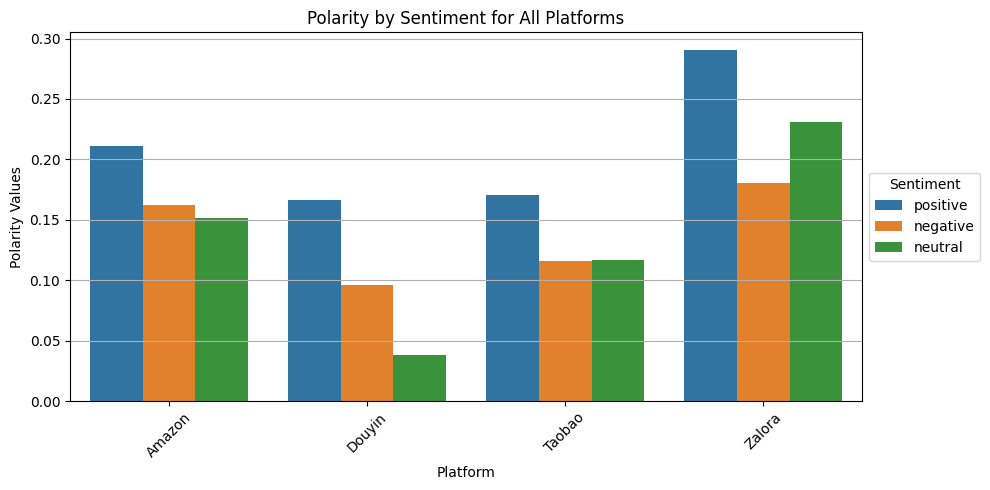

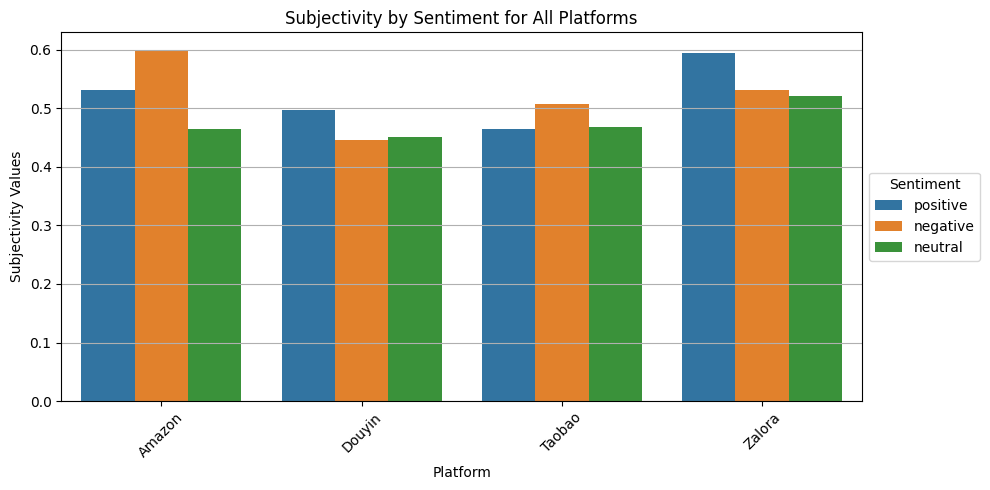

In [ ]:
plot_sep_aver_scor(all_pla_sent_sep_df)

# The second sentiment Analysis

In [ ]:
ama_diff_sce_anal = sce_aver_scor(ama_1,ama_2,ama_3, "Amazon")
dou_diff_sce_anal = sce_aver_scor(dou_1,dou_2,dou_3,'Douyin')
tao_diff_sce_anal = sce_aver_scor(tao_1,tao_2,tao_3,'Taobao')
zal_diff_sce_anal = sce_aver_scor(zal_1,zal_2,zal_3,'Zalora')
all_pla_diff_sce_df = combined_df = pd.concat([ama_diff_sce_anal, dou_diff_sce_anal, tao_diff_sce_anal, zal_diff_sce_anal], ignore_index=True)



<ipython-input-22-210eae14c6ba>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_melted, x='Metric', y='Score', hue='Platform_name', ci=None)


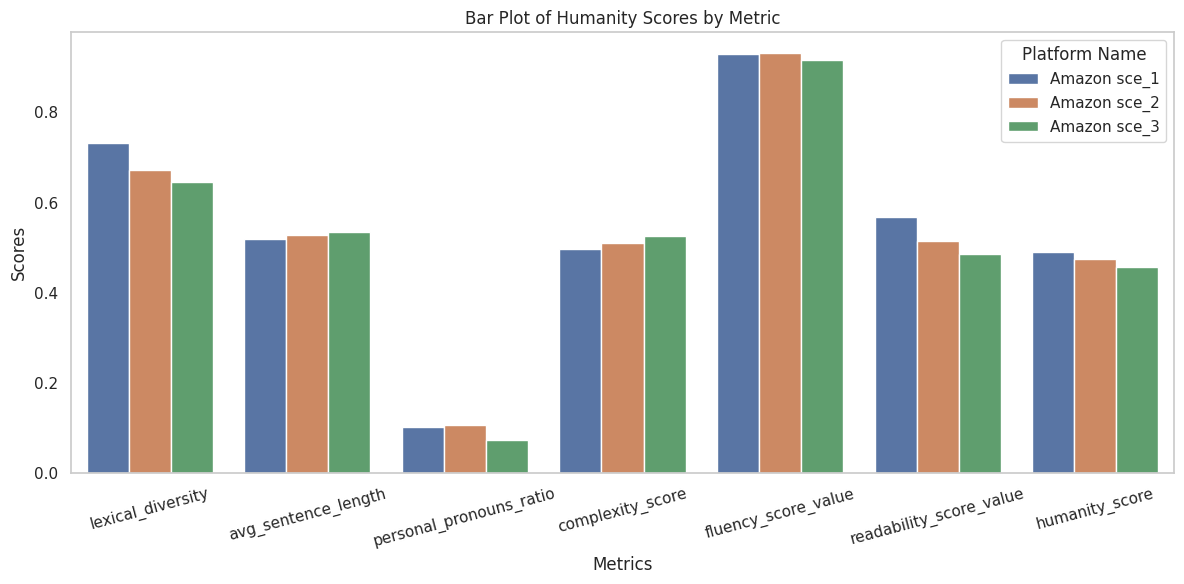

<ipython-input-22-210eae14c6ba>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_melted, x='Metric', y='Score', hue='Platform_name', ci=None)


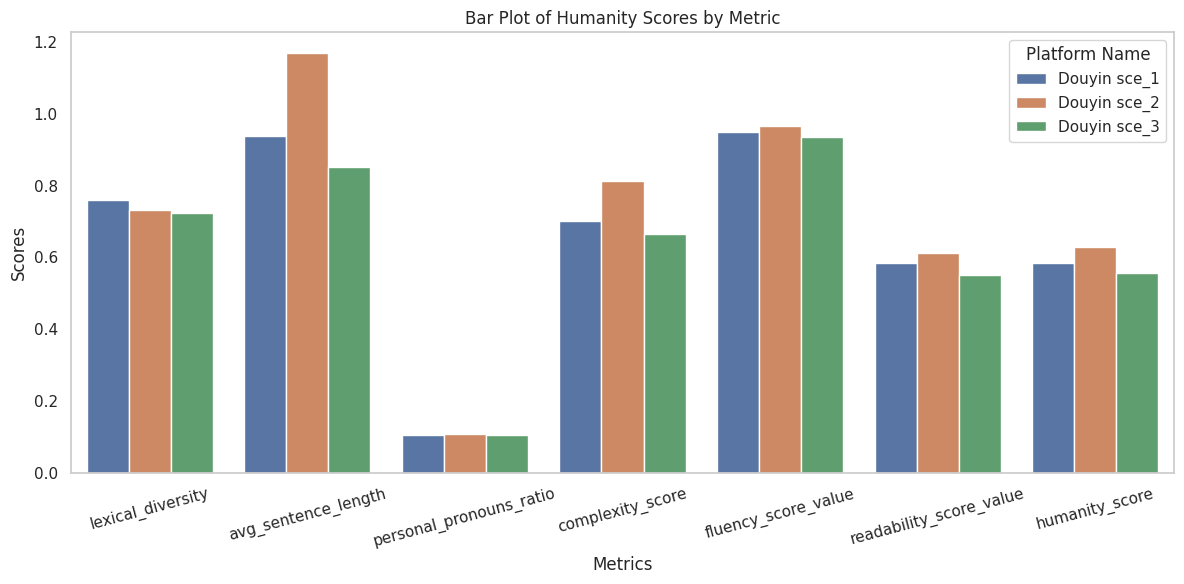

<ipython-input-22-210eae14c6ba>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_melted, x='Metric', y='Score', hue='Platform_name', ci=None)


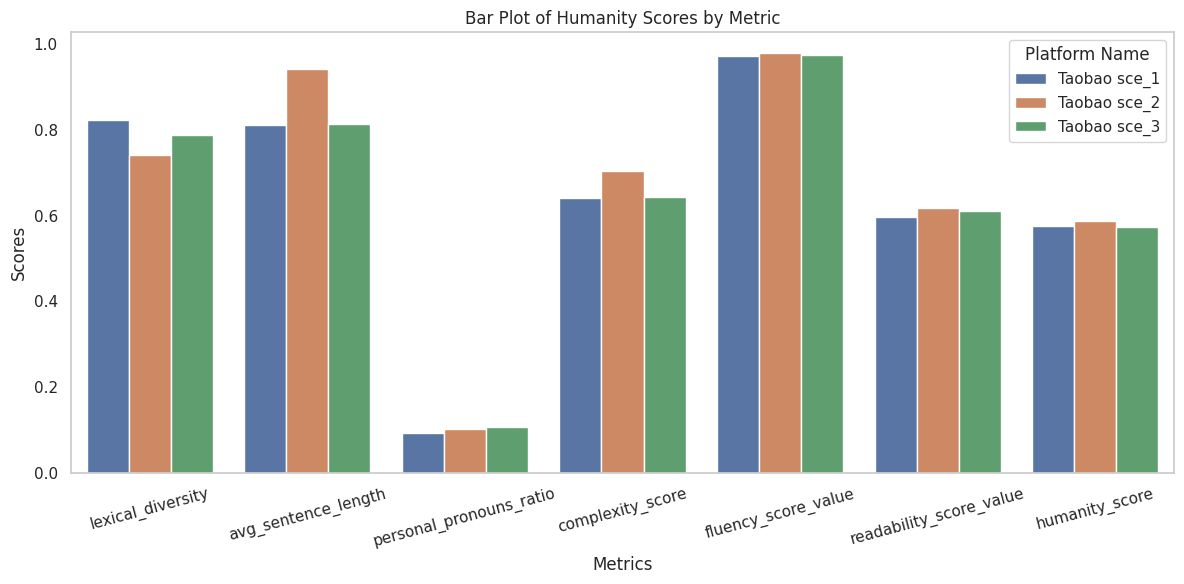

<ipython-input-22-210eae14c6ba>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_melted, x='Metric', y='Score', hue='Platform_name', ci=None)


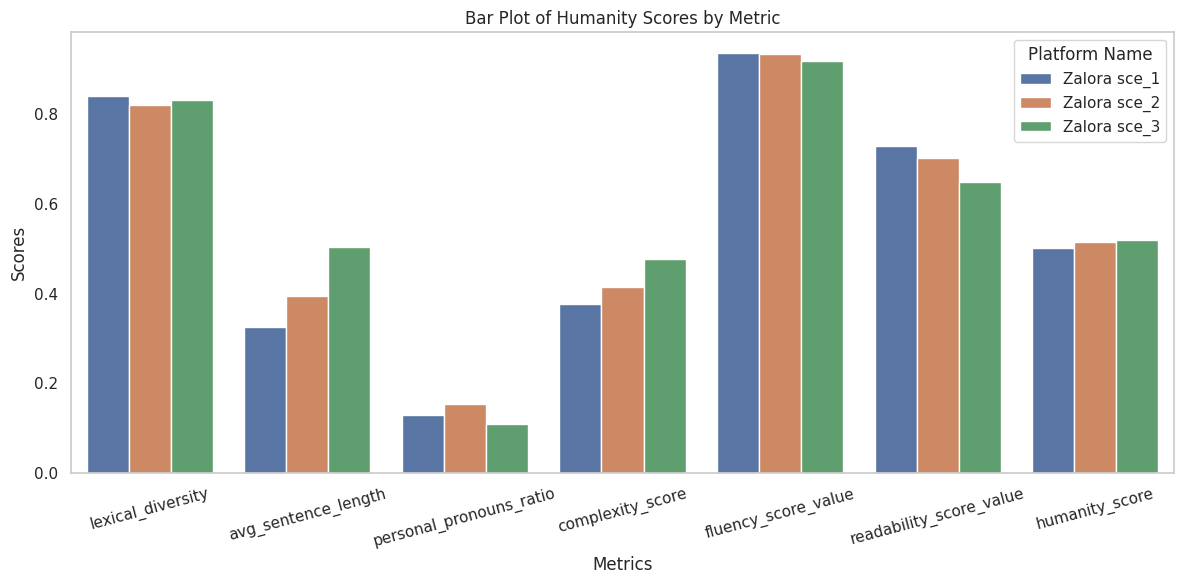

In [ ]:
plot_diff_sce_aver_scor(ama_diff_sce_anal)
plot_diff_sce_aver_scor(dou_diff_sce_anal)
plot_diff_sce_aver_scor(tao_diff_sce_anal)
plot_diff_sce_aver_scor(zal_diff_sce_anal)

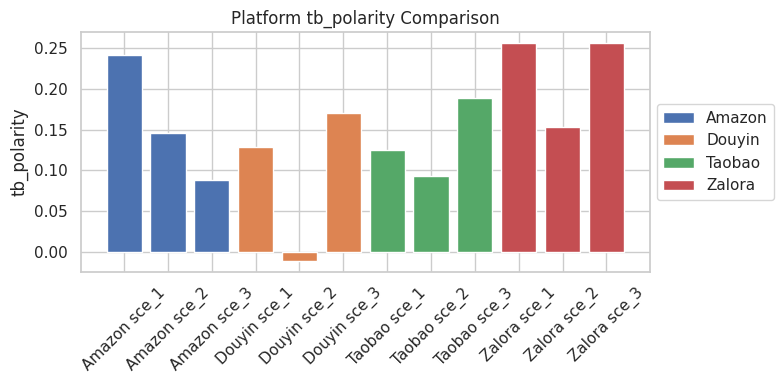

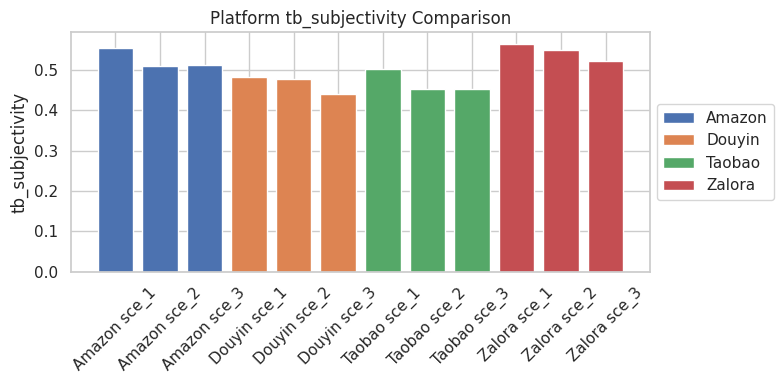

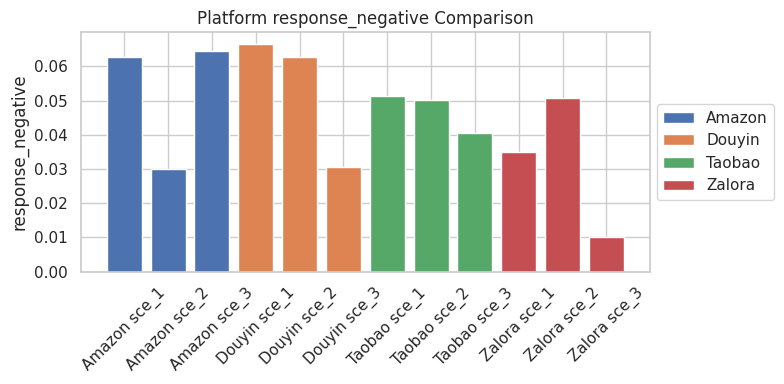

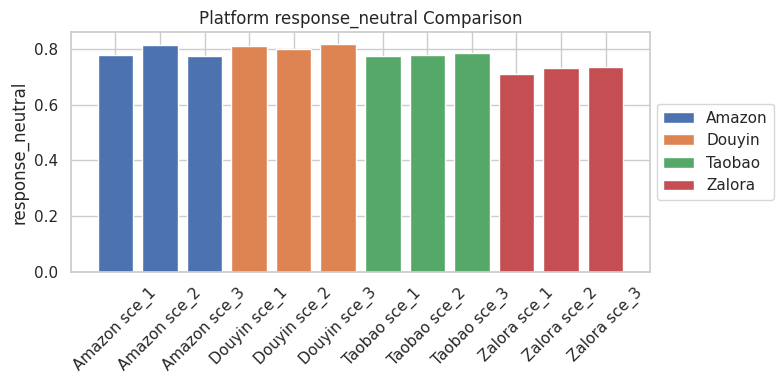

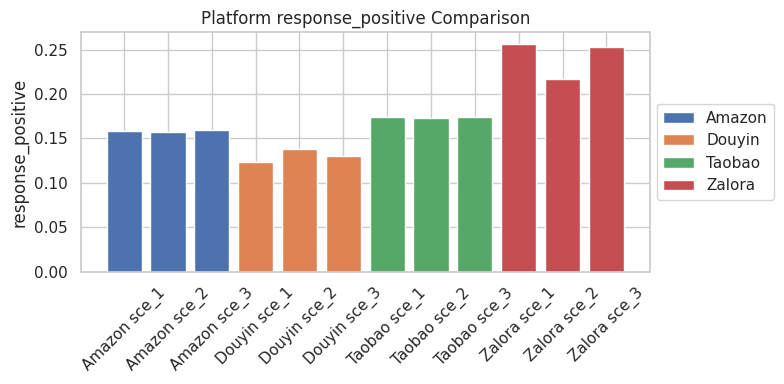

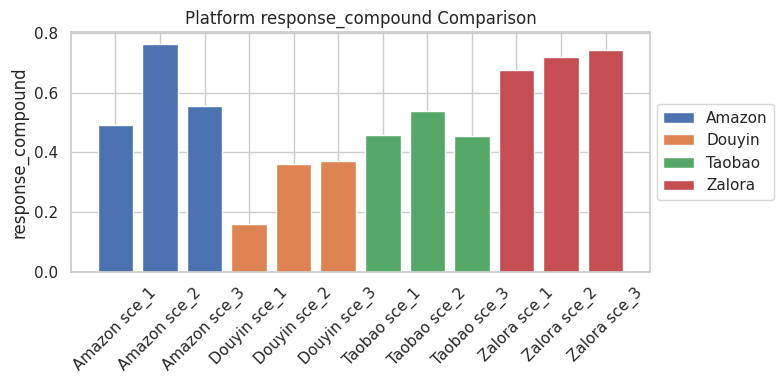

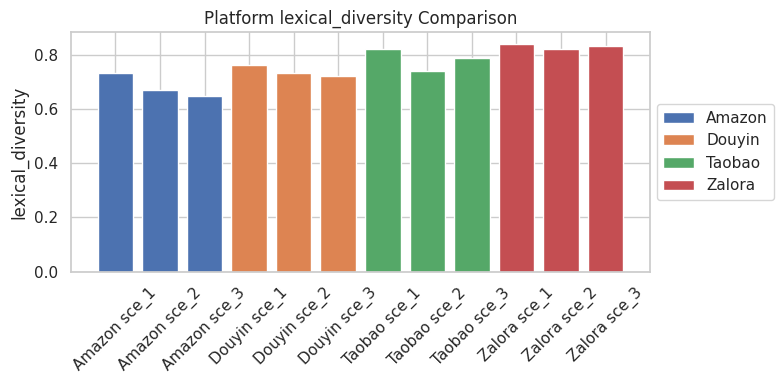

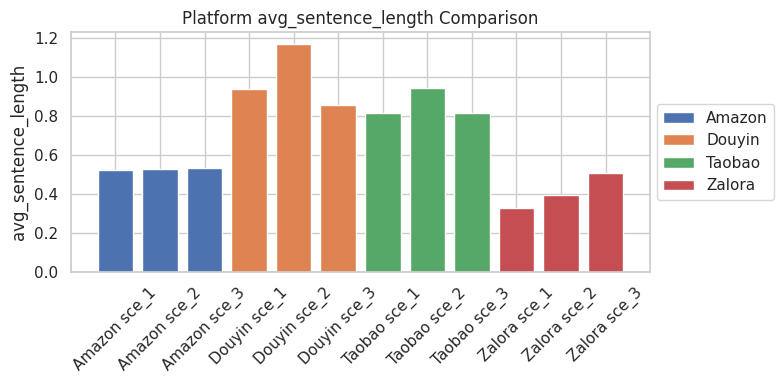

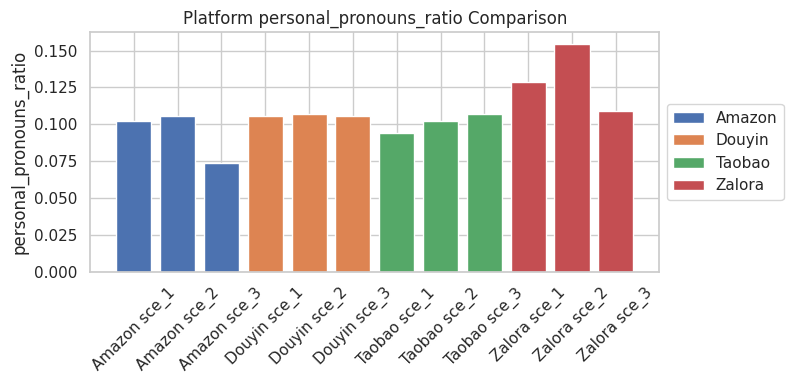

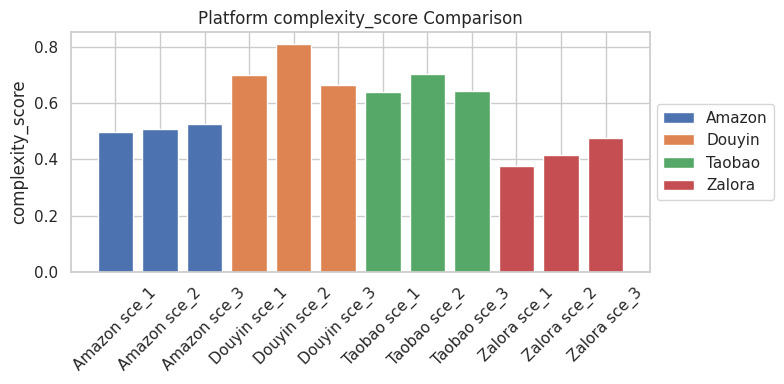

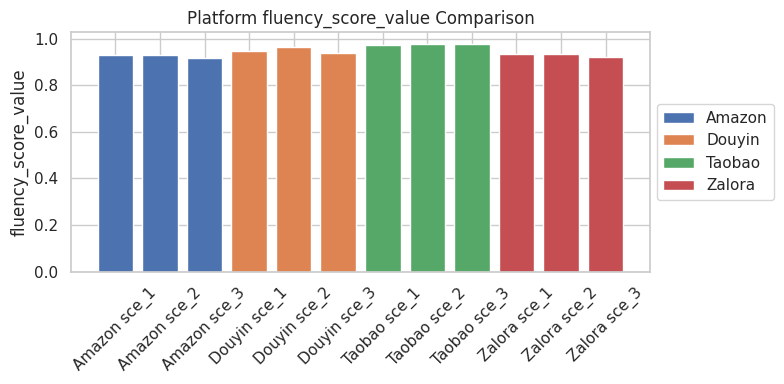

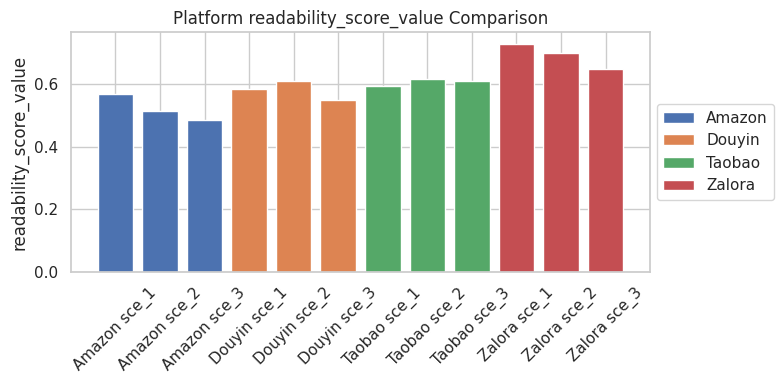

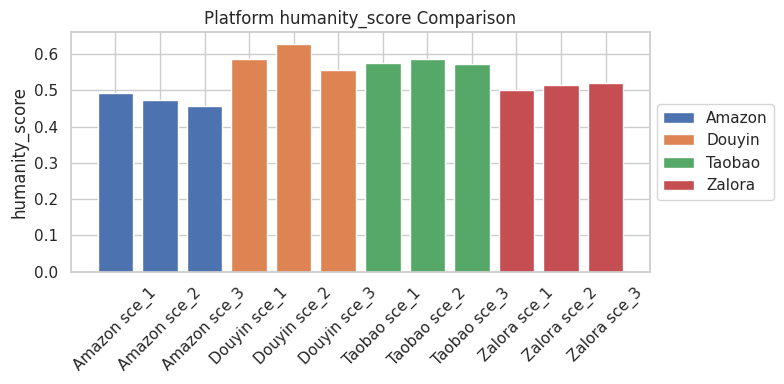

In [ ]:
plot_plat_each_score_compare(all_pla_diff_sce_df)

# The third analysis

In [ ]:
ama_real_customize_score = final_score(ama_baseline, 'custom response1','custom response2','custom response3')
dou_real_customize_score = final_score(dou_baseline, 'custom response1','custom response2','custom response3')
tao_real_customize_score = final_score(tao_baseline, 'custom response1','custom response2','custom response3')
zal_real_customize_score = final_score(zal_baseline, 'custom response1','custom response2','custom response3')



<ipython-input-13-dcfc3d6228d2>:32: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[[col3_name, col4_name, col5_name]] = df[[col3_name, col4_name, col5_name]].applymap(preprocess)
<ipython-input-13-dcfc3d6228d2>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[[col3_name, col4_name, col5_name]] = df[[col3_name, col4_name, col5_name]].applymap(preprocess)
100%|██████████| 127/127 [05:10<00:00,  2.44s/it]
<ipython-input-13-dcfc3d6228d2>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

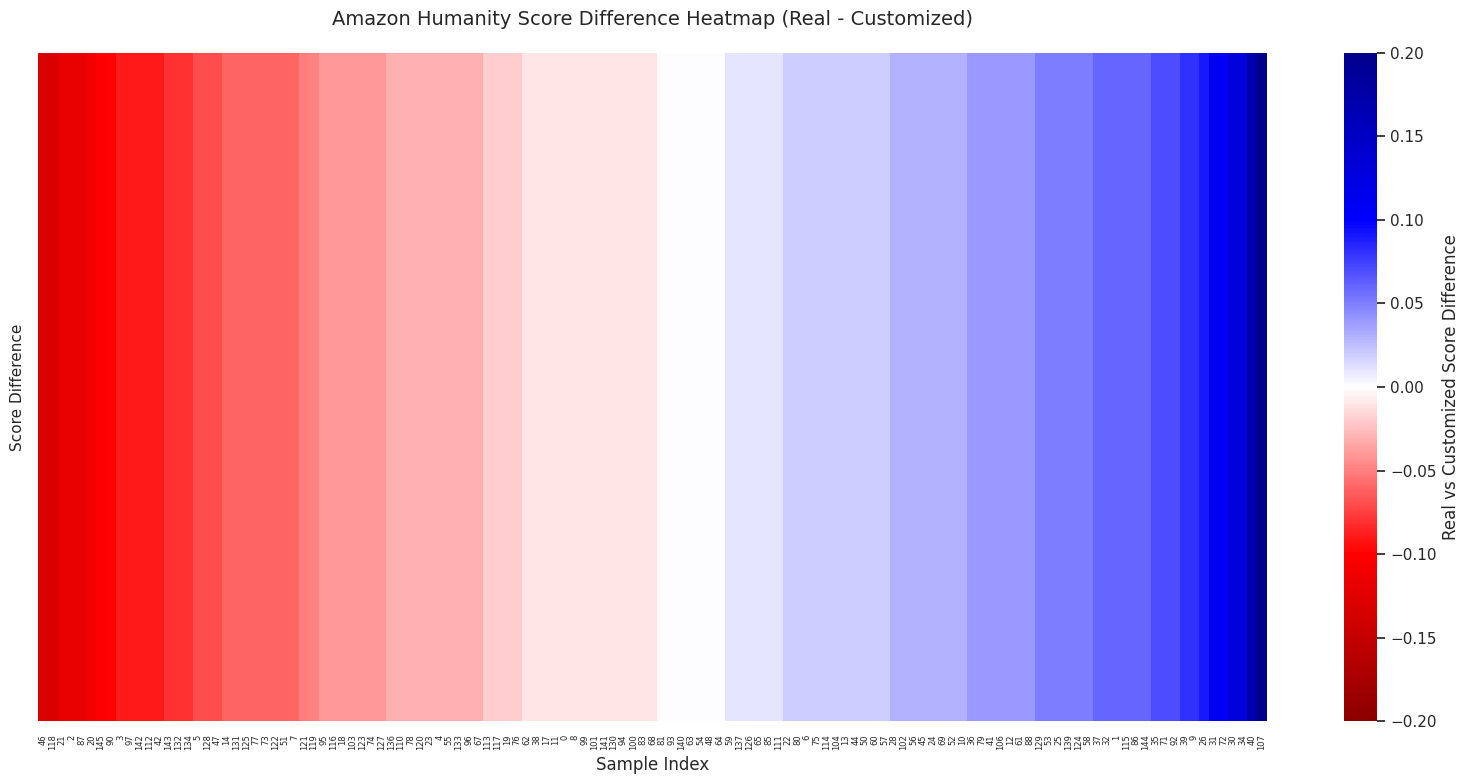

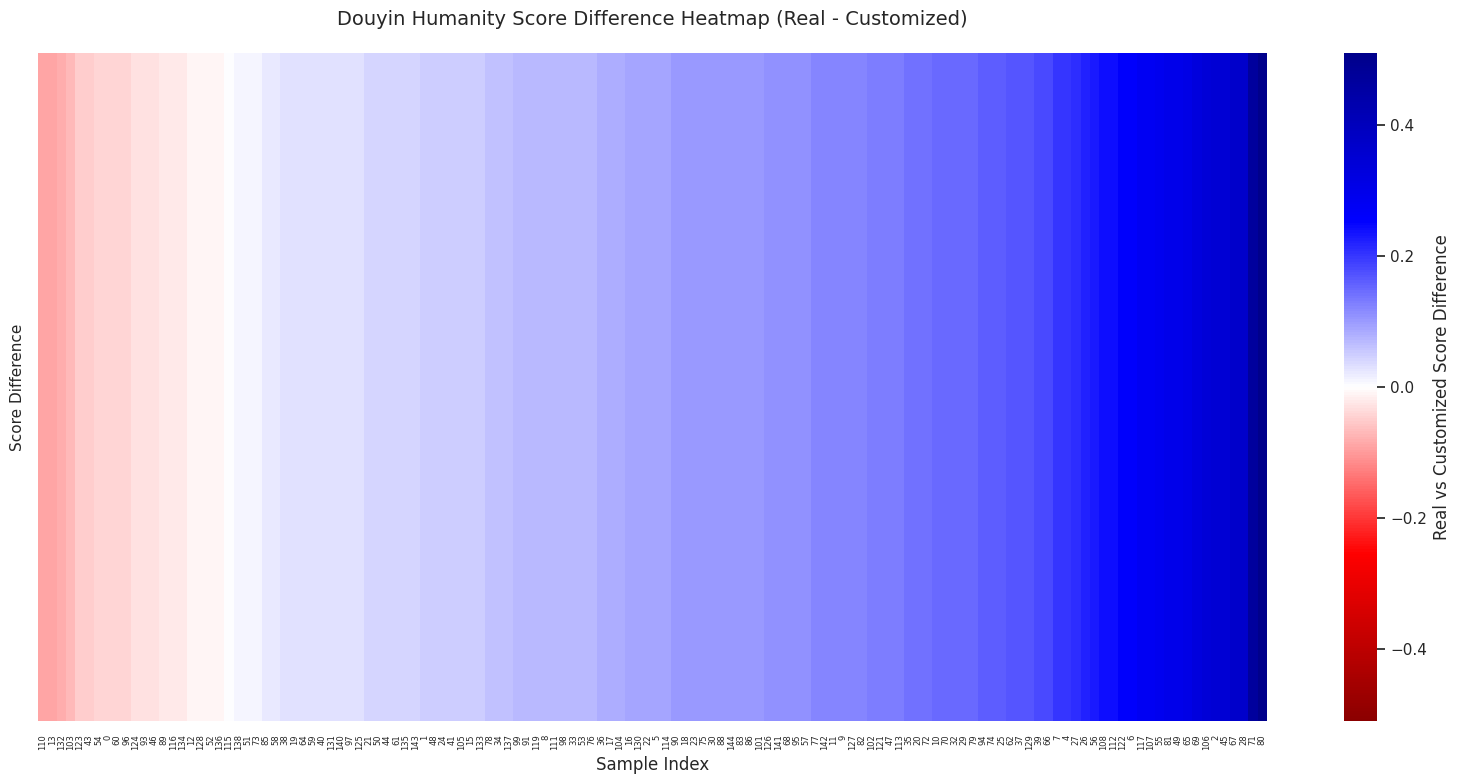

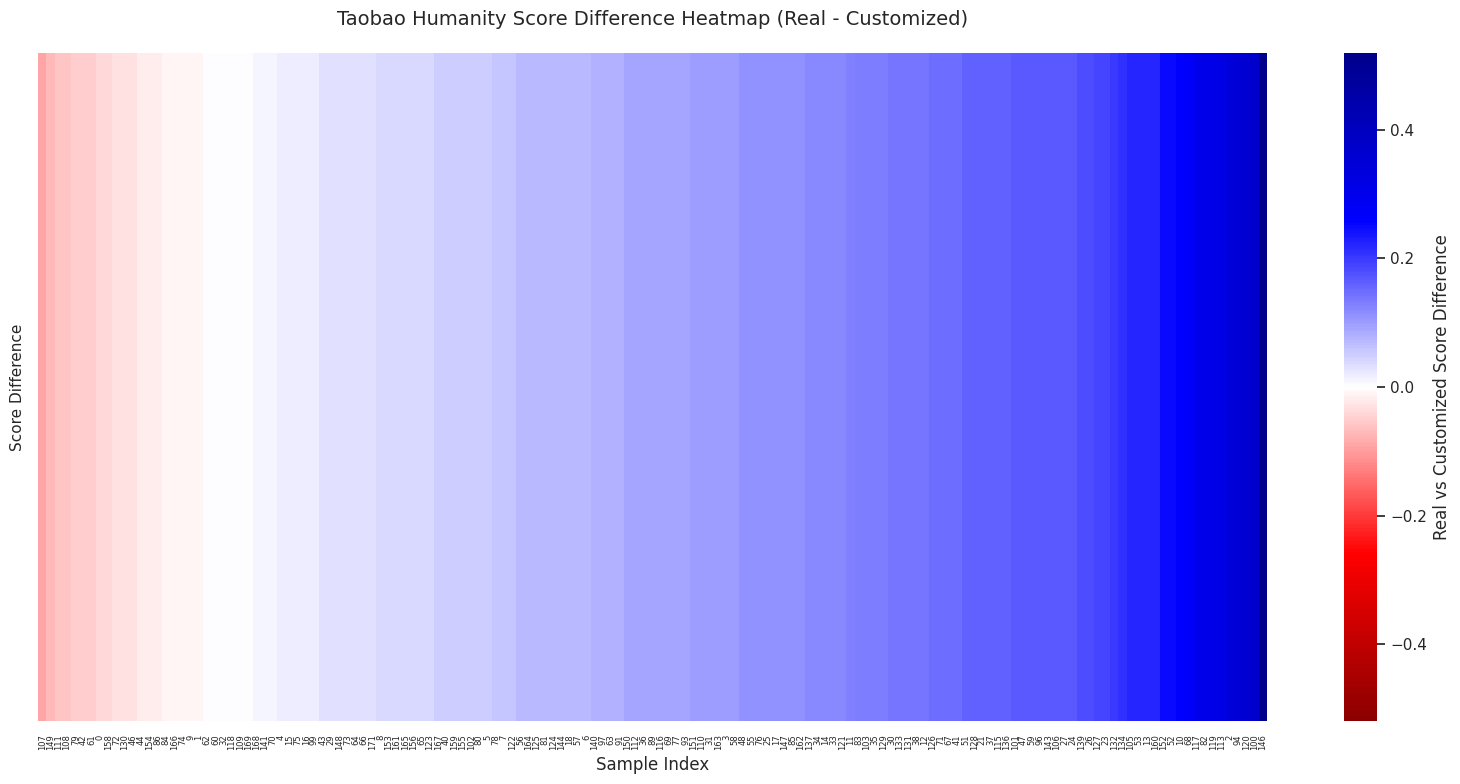

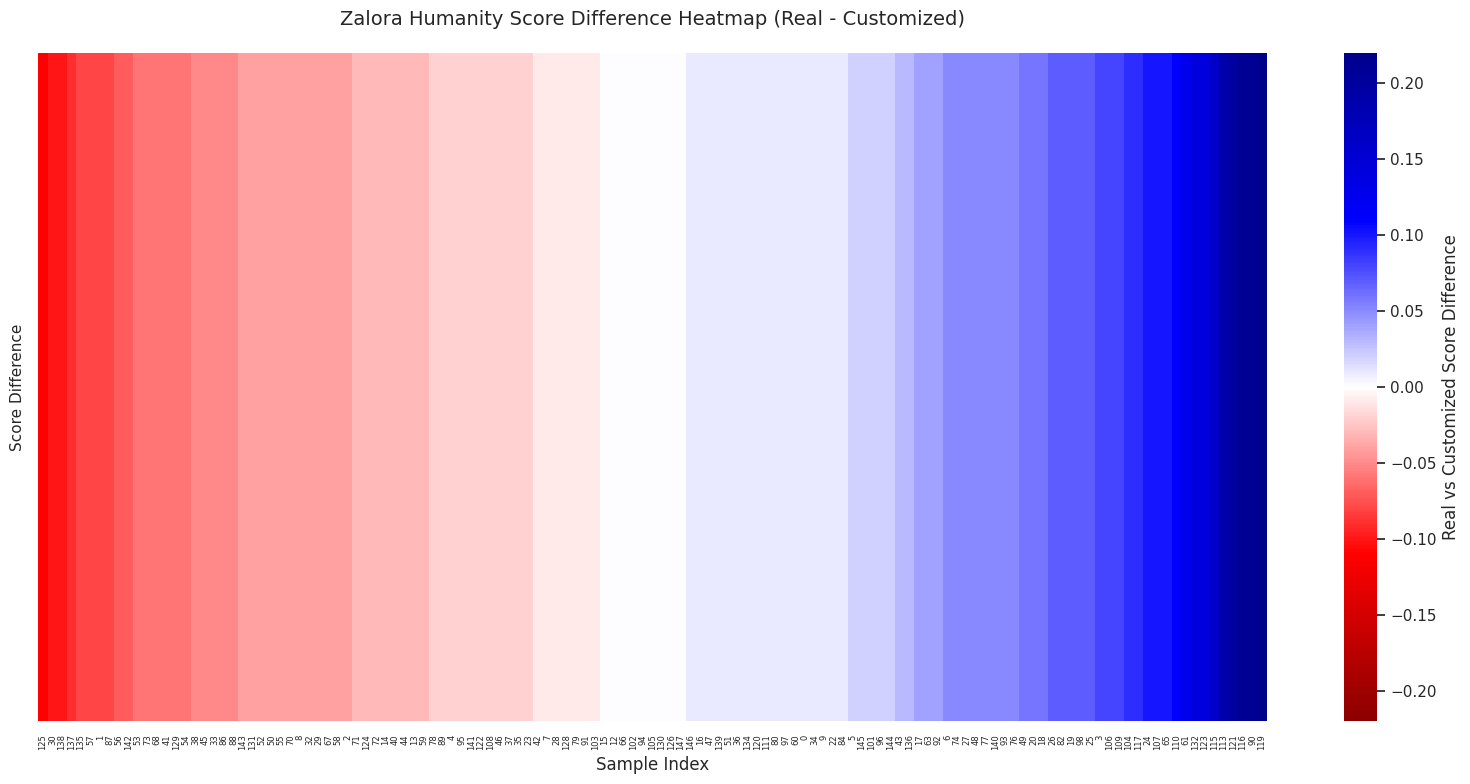

In [ ]:
plot_corr_real_custom(ama_real_customize_score,"Amazon")
plot_corr_real_custom(dou_real_customize_score,"Douyin")
plot_corr_real_custom(tao_real_customize_score,"Taobao")
plot_corr_real_custom(zal_real_customize_score,"Zalora")


# Other visualization

## Plot Sentiment Distribution

In [ ]:
ama_1_anal_df = analyze_conversations(ama_1)
ama_2_anal_df =analyze_conversations(ama_2)
ama_3_anal_df =analyze_conversations(ama_3)
dou_1_anal_df =analyze_conversations(dou_1)
dou_2_anal_df =analyze_conversations(dou_2)
dou_3_anal_df =analyze_conversations(dou_3)
tao_1_anal_df =analyze_conversations(tao_1)
tao_2_anal_df =analyze_conversations(tao_2)
tao_3_anal_df =analyze_conversations(tao_3)
zal_1_anal_df =analyze_conversations(zal_1)
zal_2_anal_df =analyze_conversations(zal_2)
zal_3_anal_df =analyze_conversations(zal_3)

In [ ]:
ama_all_anal_df = pd.concat([ama_1_anal_df, ama_2_anal_df, ama_3_anal_df], axis=0)
dou_all_anal_df = pd.concat([dou_1_anal_df, dou_2_anal_df, dou_3_anal_df], axis=0)
tao_all_anal_df = pd.concat([tao_1_anal_df, tao_2_anal_df, tao_3_anal_df], axis=0)
zal_all_anal_df = pd.concat([zal_1_anal_df, zal_2_anal_df, zal_3_anal_df], axis=0)

In [ ]:
ama_all_anal_df.head()

prompt  \
0  Honey! Mami said you can chat, really? I’m Win...   
1   I wanna make an Amazon account, can you help me?   
2  It's too complicated, can you show me the deta...   
3                   OK, let me give it a try, thank~   
4  Why need birthday? I’m a bunny zodiac! But Mam...   

                                            response  \
0  I'm afraid I can't have a conversation like th...   
1  Yes, I can help you create an Amazon account. ...   
2  I can help you create an Amazon account with a...   
3  To set up a child profile on your Amazon accou...   
4   \nI don't have enough context to provide a me...   

                                    processed_prompt  \
0  honey! mami said you can chat, really? im wind...   
1   i wanna make an amazon account, can you help me?   
2  its too complicated, can you show me the detai...   
3                    ok, let me give it a try, thank   
4  why need birthday? im a bunny zodiac! but mami...   

                                  processed_response  tb_polarity  \
0  im afraid i cant have a conversation like that...     0.066667   
1  yes, i can help you create an amazon account. ...     0.250000   
2  i can help you create an amazon account with a...     0.142946   
3  to set up a child profile on your amazon accou...     0.183257   
4  i dont have enough context to provide a meanin...     0.389286   

   tb_subjectivity  response_negative  response_neutral  response_positive  \
0         0.675000              0.050             0.741              0.208   
1         0.300000              0.011             0.711              0.278   
2         0.346071              0.077             0.819              0.104   
3         0.390781              0.067             0.823              0.110   
4         0.649675              0.000             0.679              0.321   

   response_compound  lexical_diversity  avg_sentence_length  \
0             0.7643             0.7619               0.4667   
1             0.9643             0.5652               0.6133   
2             0.2942             0.4971               0.4487   
3             0.6476             0.4975               0.4422   
4             0.9831             0.7632               0.6333   

   personal_pronouns_ratio  complexity_score  fluency_score_value  \
0                   0.1667            0.4333               0.9524   
1                   0.0978            0.5453               0.9565   
2                   0.0400            0.4738               0.9029   
3                   0.0553            0.4759               0.9246   
4                   0.0395            0.5732               1.0000   

   readability_score_value  humanity_score  
0                   0.6674            0.52  
1                   0.5300            0.47  
2                   0.5777            0.40  
3                   0.5798            0.41  
4                   0.4393            0.50

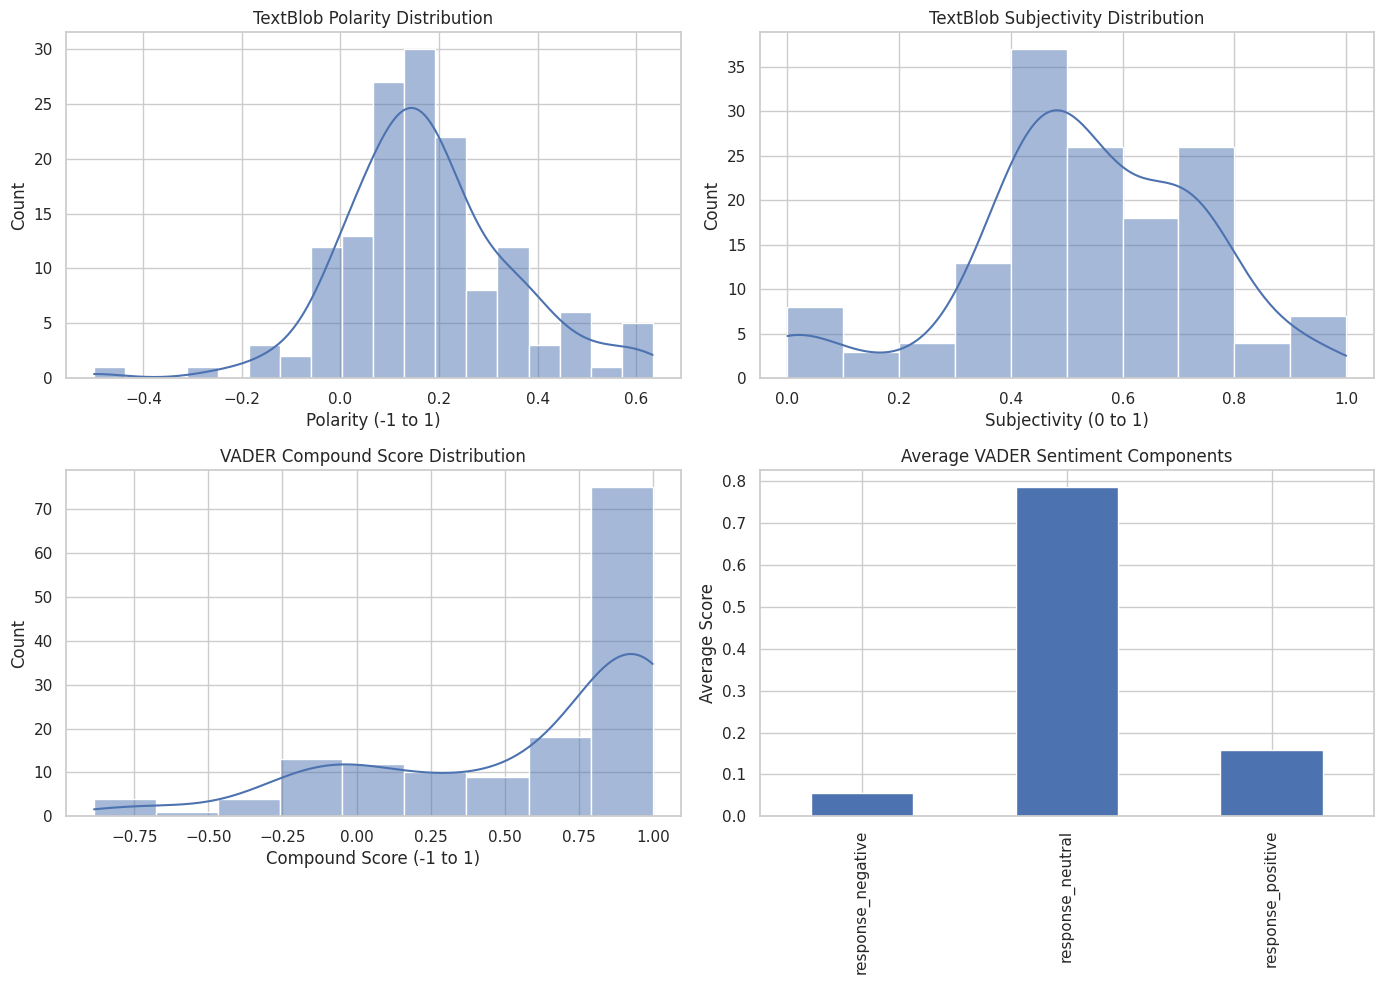

In [ ]:
plot_sentiment_distribution(ama_all_anal_df);

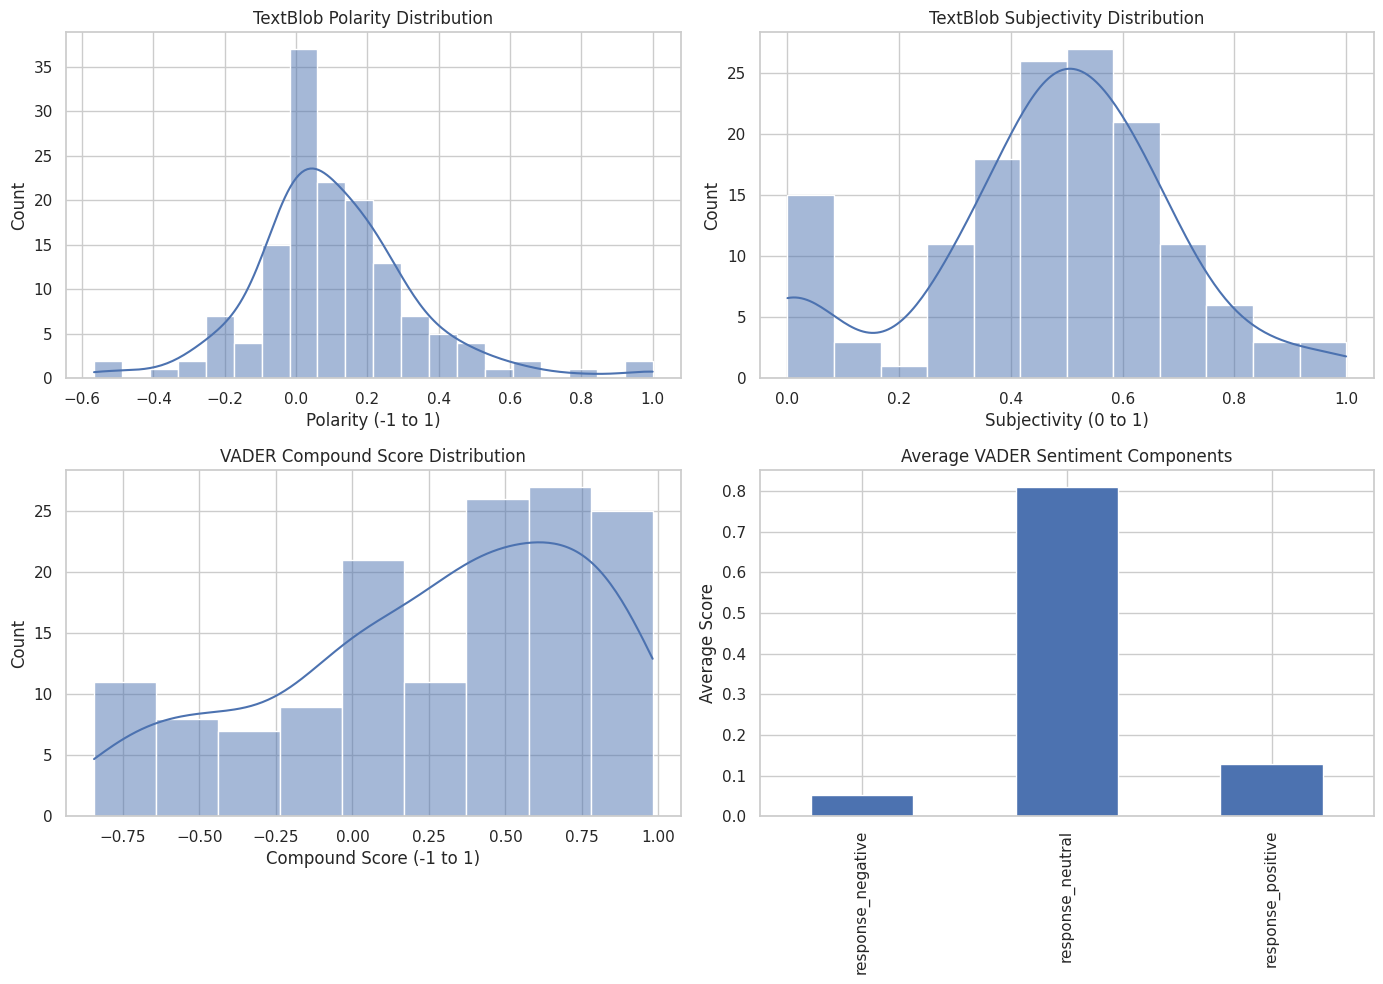

In [ ]:
plot_sentiment_distribution(dou_all_anal_df);

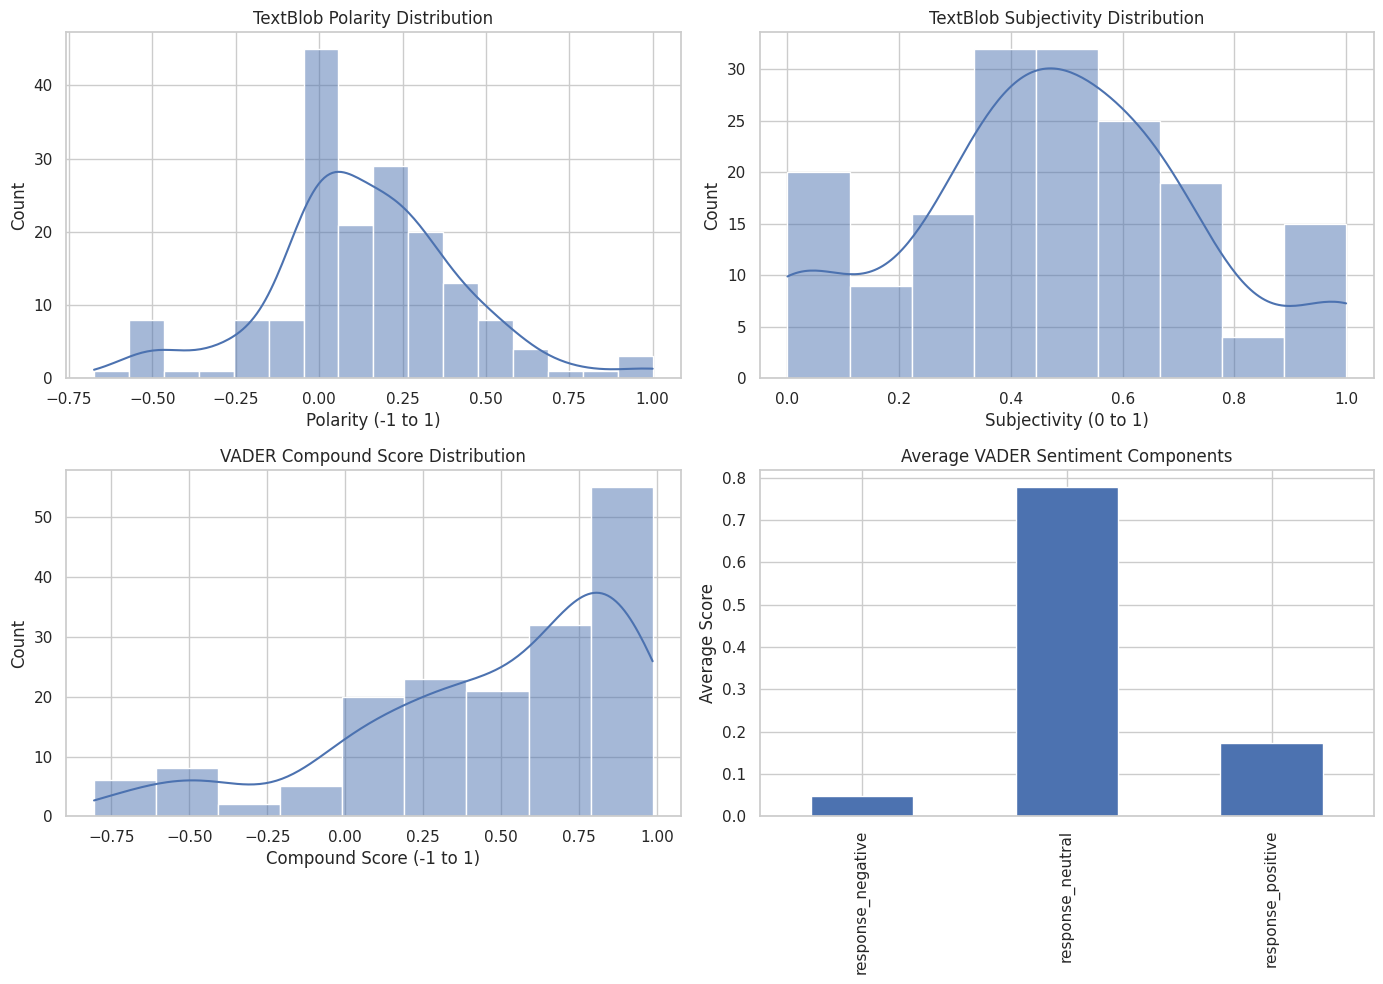

In [ ]:
plot_sentiment_distribution(tao_all_anal_df);

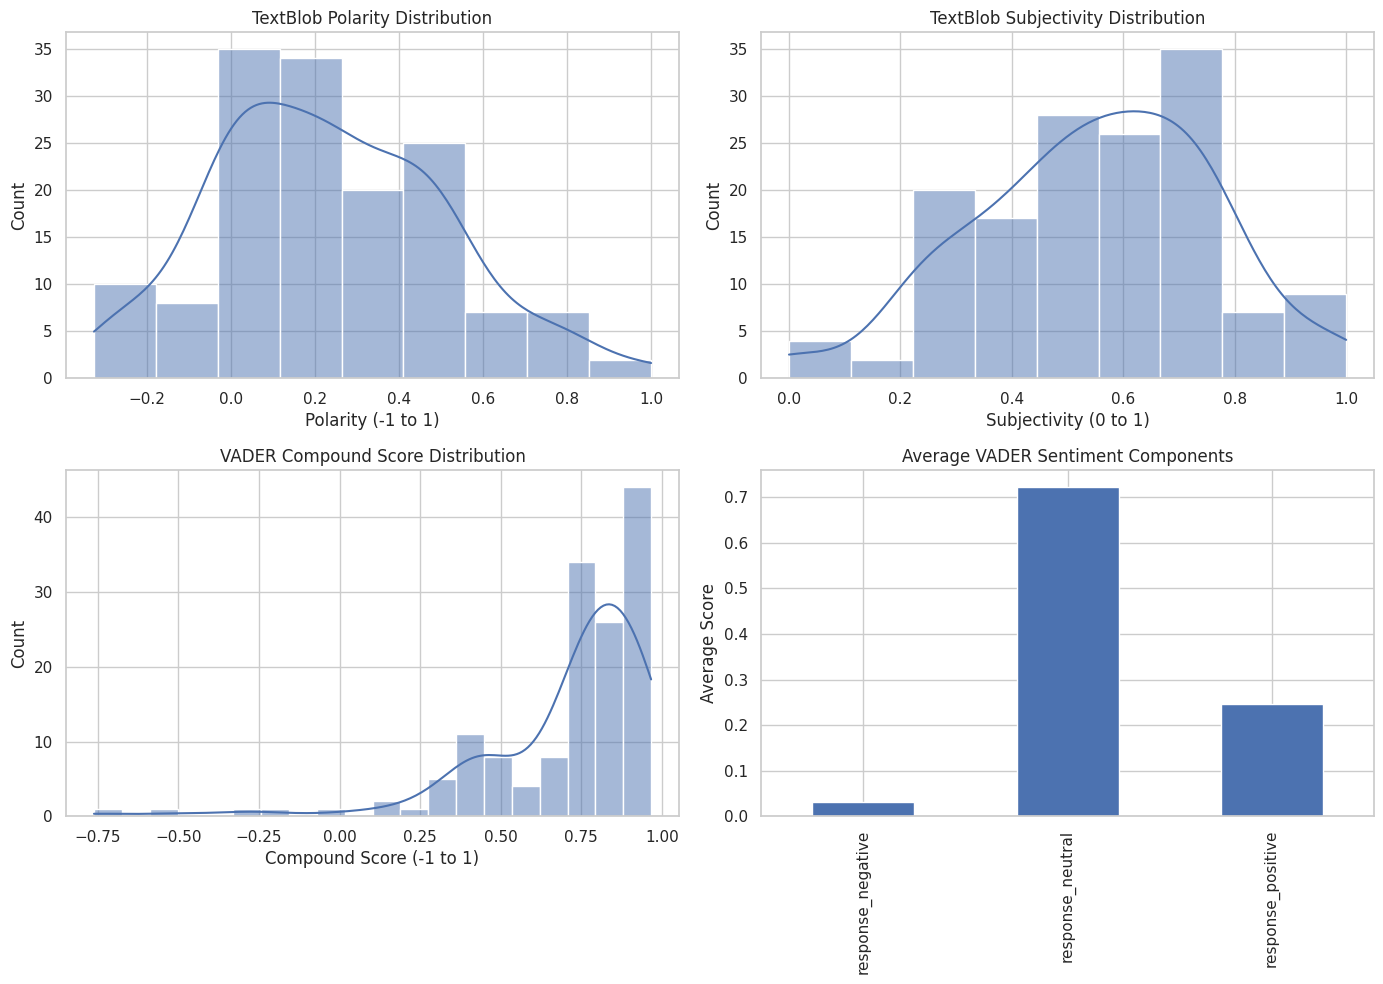

In [ ]:
plot_sentiment_distribution(zal_all_anal_df);

## Plot Humanity Score Distribution

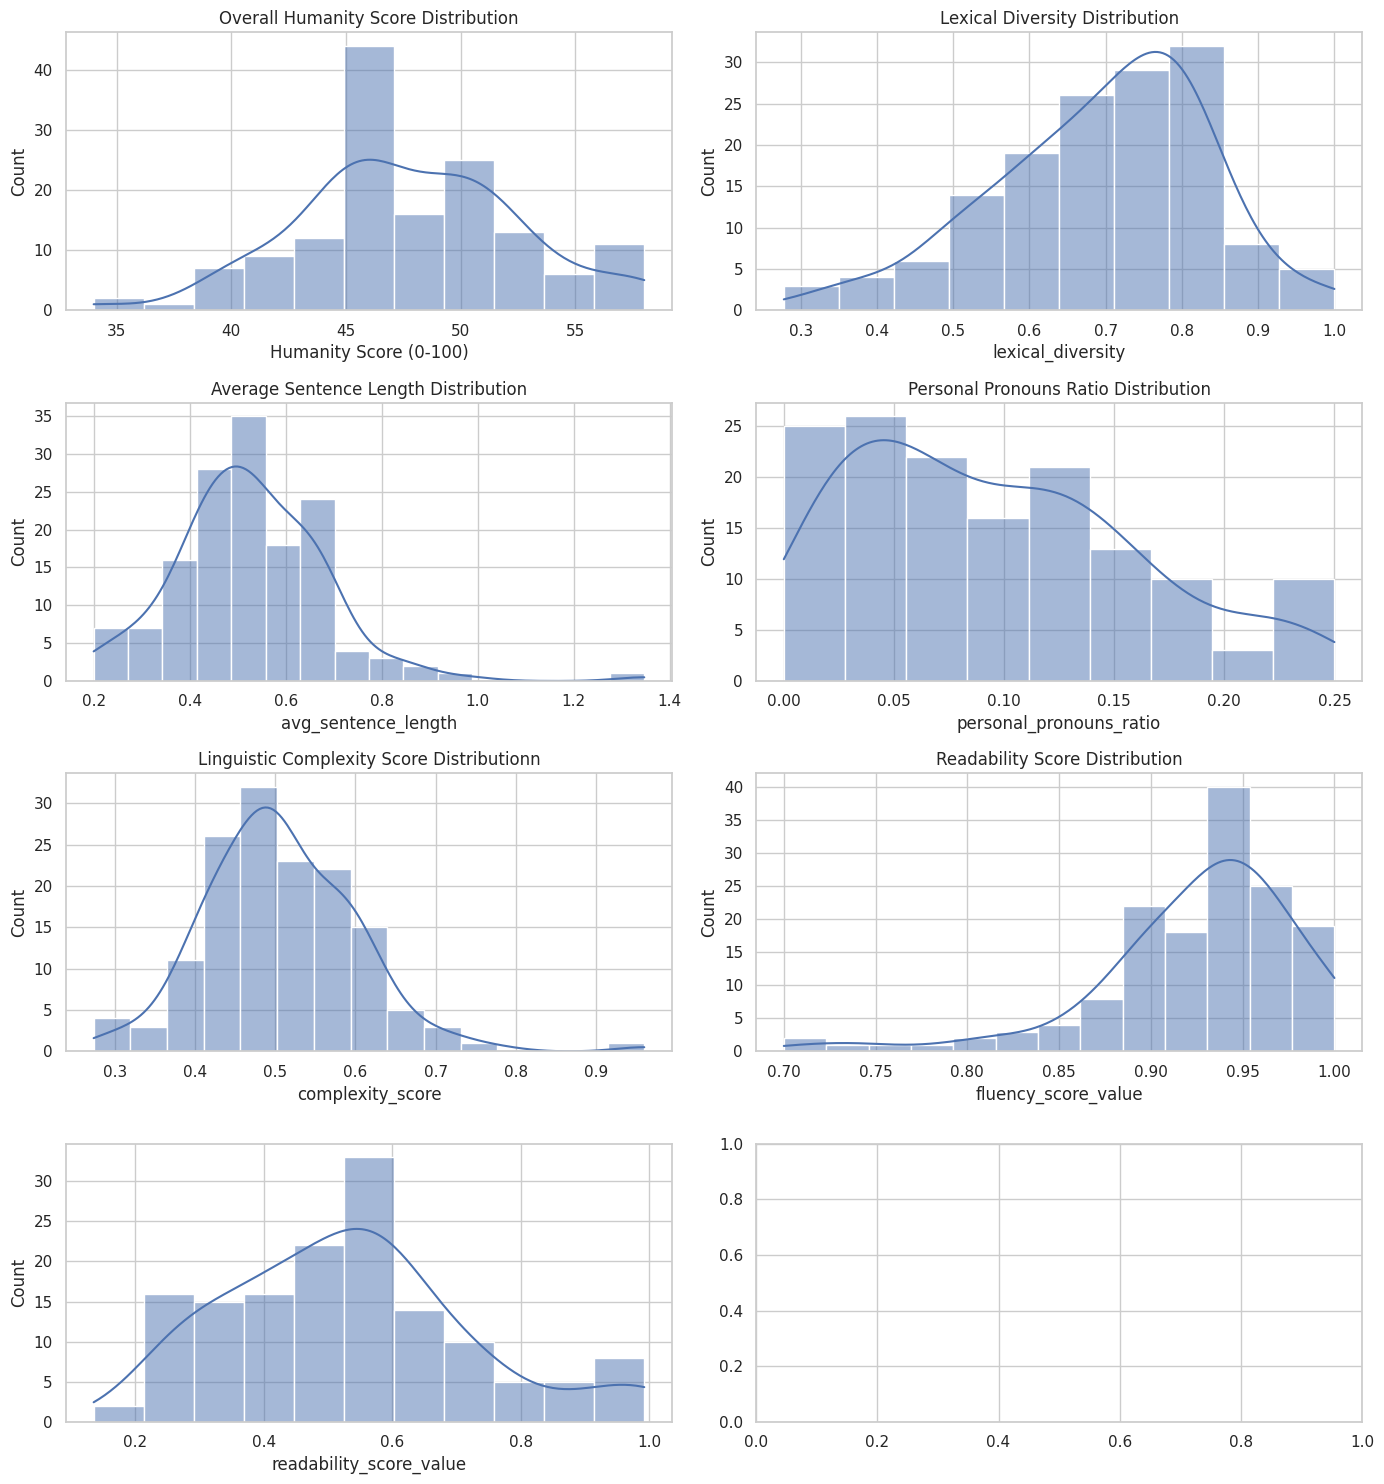

In [ ]:
plot_humanity_metrics(ama_all_anal_df);

## Plot cloud word


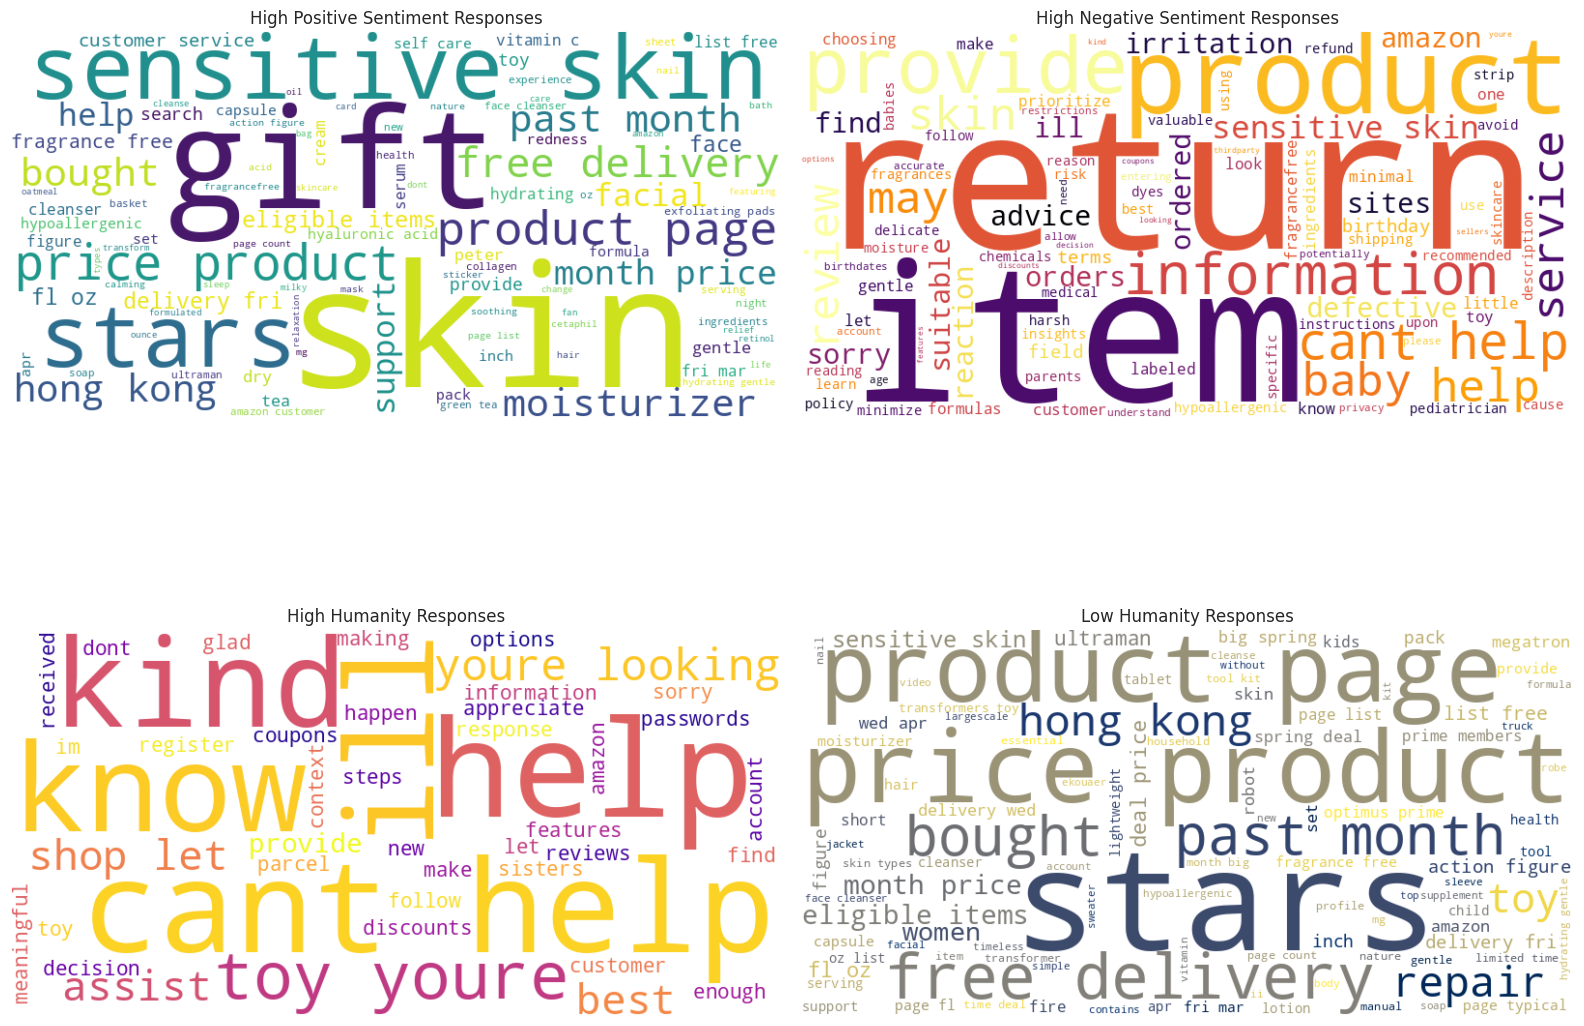

In [ ]:
create_word_clouds(ama_all_anal_df);

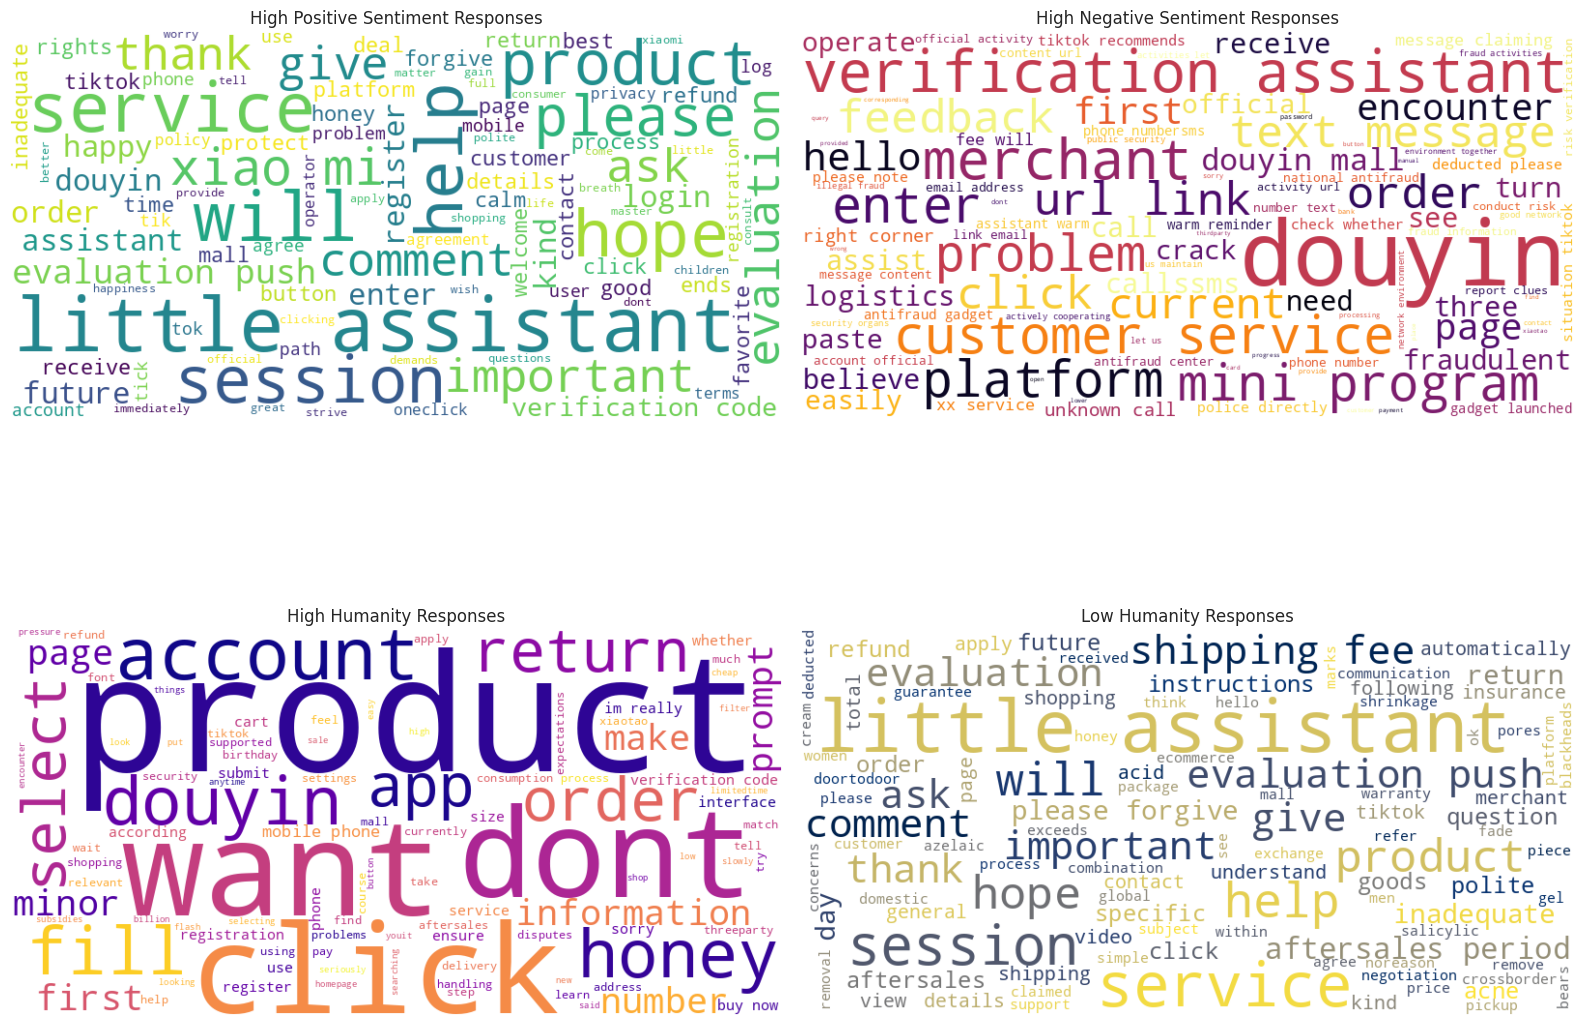

In [ ]:
create_word_clouds(dou_all_anal_df);

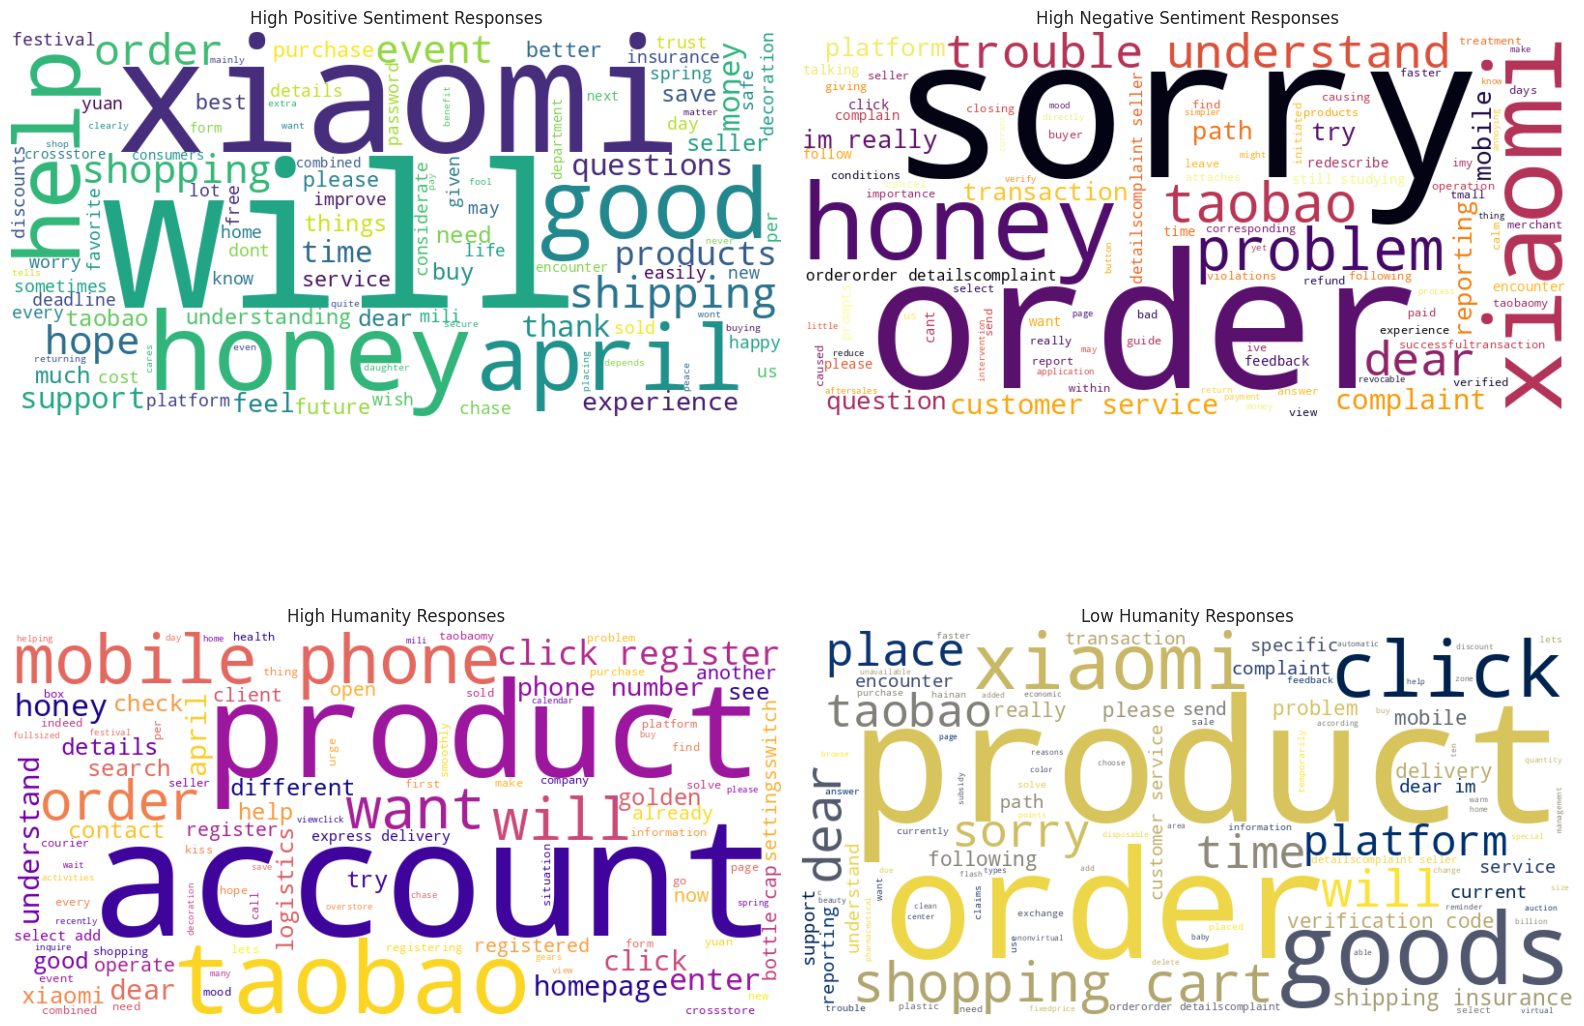

In [ ]:
create_word_clouds(tao_all_anal_df);

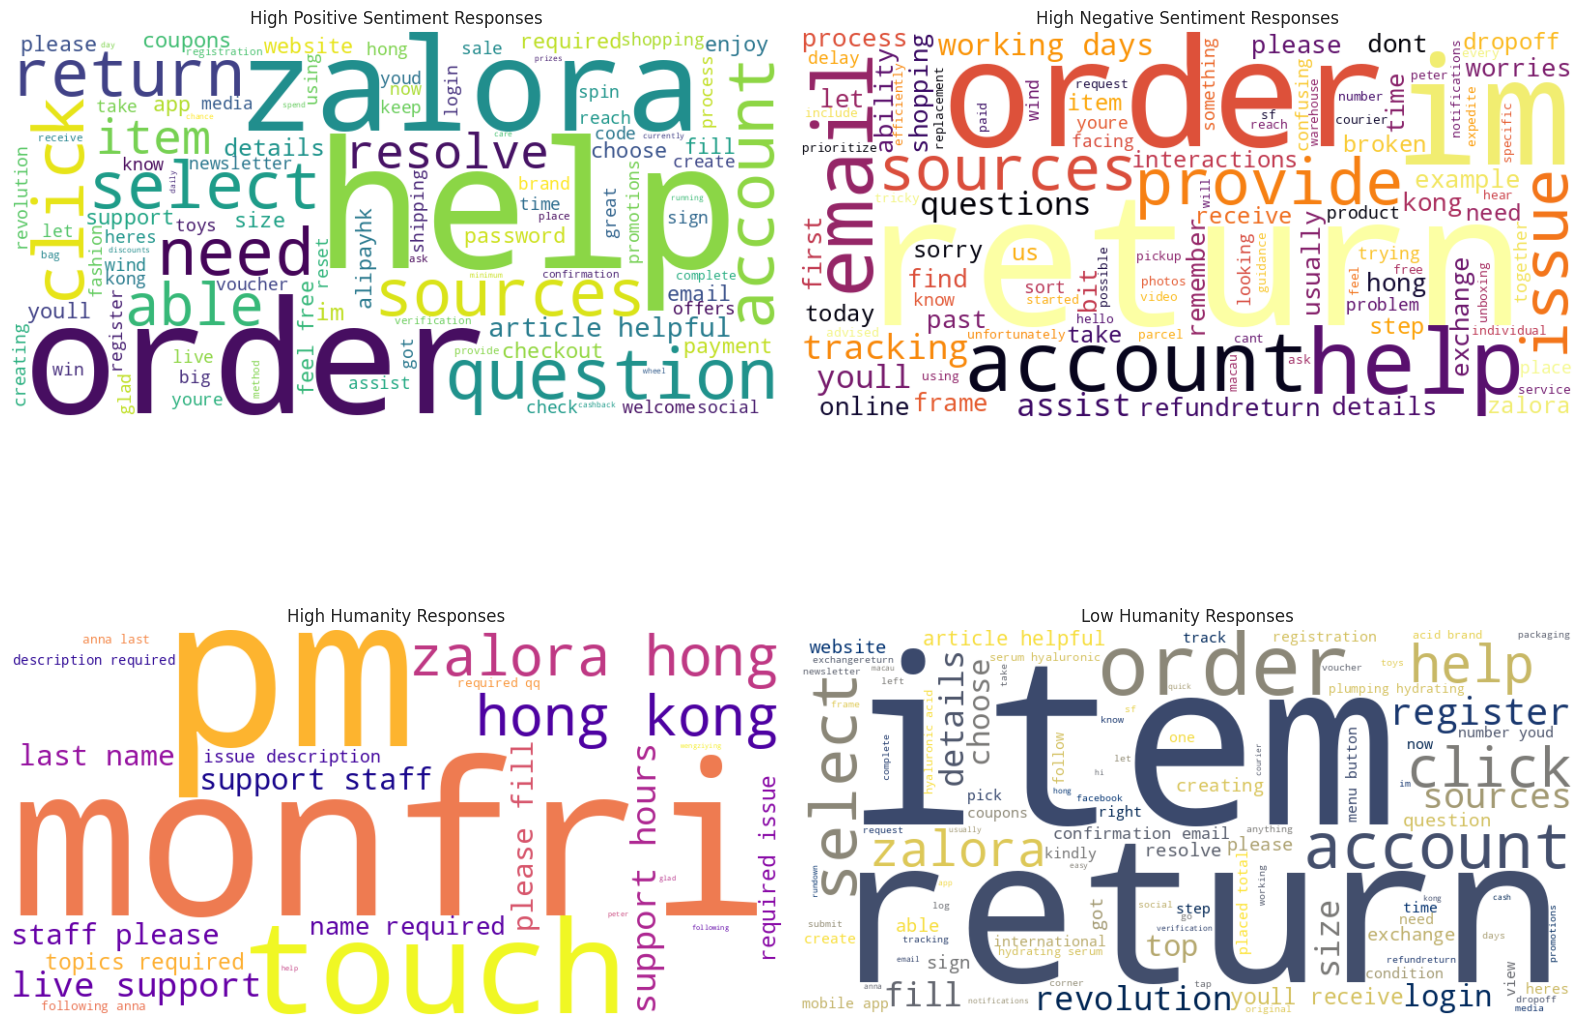

In [ ]:
create_word_clouds(zal_all_anal_df);